# 서울시 교통사고 분석 예측 프로젝트

0. 데이터 전처리  
1. EDA  
 (1) 사고 발생 추세  
 (2) 인적특성  
 (3) 사고 다발 장소  
 (4) 사고 유형별  
 (5) 사고 등급별  
 (6) 법규위반  
 (7) 기상상태  
 (8) 차종/용도별  

# 0. 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns 

fm=mp.font_manager.FontManager()
plt.rcParams['font.family']='Malgun Gothic'

#plt.style.use("seaborn-pastel")
plt.style.use("fivethirtyeight")

In [2]:
df=pd.read_csv('C:/Users/ajin1/OneDrive/바탕 화면/25개자치구_사고다발데이터/교통사고_통합.csv', encoding='cp949')
df

,년도,월,일,요일,시각,사고등급,사망자수,중상자수,경상자수,부상자수,...,일광상태,사고유형1,사고유형2,법규위반,도로종류,지점명,위도,경도,자치구,Unnamed: 28
0,2017,3,2,목요일,11,경상사고,0,0,1,0,...,주간,차대차,정면충돌,신호위반,특별광역시도,구역삼세무서,37.498266,127.030105,강남구,NaN
1,2017,3,5,일요일,12,경상사고,0,0,2,0,...,주간,차대차,측면직각충돌,안전거리미확보,특별광역시도,구역삼세무서,37.498266,127.030105,강남구,NaN
2,2017,3,27,월요일,23,경상사고,0,0,1,0,...,심야,차대차,정면충돌,안전운전불이행,특별광역시도,구역삼세무서,37.498266,127.030105,강남구,NaN
3,2017,4,21,금요일,1,중상사고,0,2,0,0,...,심야,차대차,정면충돌,신호위반,특별광역시도,구역삼세무서,37.498266,127.030105,강남구,NaN
4,2017,4,30,일요일,8,경상사고,0,0,1,0,...,출퇴근,차대차,정면충돌,안전운전불이행,특별광역시도,구역삼세무서,37.498266,127.030105,강남구,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20056,2019,4,4,목요일,14,경상사고,0,0,1,0,...,주간,차대차,측면직각충돌,직진우회전진행방해,특별광역시도,중화중삼거리,37.586616,127.094805,중랑구,NaN
20057,2019,7,9,화요일,15,경상사고,0,0,1,0,...,주간,차대차,추돌(진행중),안전거리미확보,특별광역시도,중화중삼거리,37.586616,127.094805,중랑구,NaN
20058,2019,9,16,월요일,8,중상사고,0,1,0,0,...,출퇴근,차대차,측면직각충돌,신호위반,특별광역시도,중화중삼거리,37.586616,127.094805,중랑구,NaN
20059,2019,10,2,수요일,9,경상사고,0,0,3,0,...,주간,차대차,추돌(진행중),안전거리미확보,특별광역시도,중화중삼거리,37.586616,127.094805,중랑구,NaN


In [3]:
#변수별 Null값과 Dtype확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20061 entries, 0 to 20060
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   년도           20061 non-null  int64  
 1   월            20061 non-null  int64  
 2   일            20061 non-null  int64  
 3   요일           20061 non-null  object 
 4   시각           20061 non-null  int64  
 5   사고등급         20061 non-null  object 
 6   사망자수         20061 non-null  int64  
 7   중상자수         20061 non-null  int64  
 8   경상자수         20061 non-null  int64  
 9   부상자수         20061 non-null  int64  
 10  연령           20061 non-null  object 
 11  성별           20061 non-null  object 
 12  경력           20061 non-null  object 
 13  음주           1376 non-null   float64
 14  종별           20061 non-null  object 
 15  용도           20061 non-null  object 
 16  관련자2         20061 non-null  object 
 17  사고형태         20061 non-null  object 
 18  기상상태         20061 non-null  object 
 19  일광상태

In [4]:
#총 20061개의 데이터와 29개 변수로 구성됨 
df.shape

(20061, 29)

In [5]:
df.columns

Index(['년도', '월', '일', '요일', '시각', '사고등급', '사망자수', '중상자수', '경상자수', '부상자수',
       '연령', '성별', '경력', '음주', '종별', '용도', '관련자2', '사고형태', '기상상태', '일광상태',
       '사고유형1', '사고유형2', '법규위반', '도로종류', '지점명', '위도', '경도', '자치구',
       'Unnamed: 28'],
      dtype='object')

In [6]:
df.isnull().sum()       

년도                 0
월                  0
일                  0
요일                 0
시각                 0
사고등급               0
사망자수               0
중상자수               0
경상자수               0
부상자수               0
연령                 0
성별                 0
경력                 0
음주             18685
종별                 0
용도                 0
관련자2               0
사고형태               0
기상상태               0
일광상태               0
사고유형1              0
사고유형2              0
법규위반               0
도로종류               0
지점명                0
위도                 0
경도                 0
자치구                0
Unnamed: 28    19795
dtype: int64

## (1) 변수 별 value 확인 

In [7]:
set(df['년도'])

{2017, 2018, 2019}

In [8]:
set(df['월'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [9]:
print(set(df['일']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}


In [10]:
set(df['요일'])

{'금요일', '목요일', '수요일', '월요일', '일요일', '토요일', '화요일'}

In [11]:
print(set(df['시각']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


In [12]:
set(df['사고등급'])

{'경상사고', '부상사고', '사망사고', '중상사고'}

In [13]:
set(df['사망자수'])

{0, 1, 2}

In [14]:
set(df['중상자수'])

{0, 1, 2, 3, 4, 5, 6, 8, 9, 14}

In [15]:
set(df['경상자수'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 24, 28, 41}

In [16]:
set(df['부상자수'])

{0, 1, 2, 3, 4, 5, 6, 7, 10}

In [17]:
#'불명'이라고 표기된 값이 있음
print(set(df['연령']))

{'43', '86', '67', '83', '81', '27', '10', '87', '80', '15', '7', '11', '55', '89', '37', '17', '84', '50', '56', '53', '59', '29', '14', '75', '57', '70', '41', '48', '51', '72', '49', '불명', '33', '68', '16', '40', '76', '52', '58', '23', '73', '30', '12', '85', '25', '77', '18', '20', '63', '31', '42', '19', '47', '46', '82', '54', '95', '22', '88', '74', '65', '98', '78', '66', '69', '61', '24', '64', '13', '28', '44', '45', '34', '62', '26', '39', '79', '71', '38', '35', '36', '32', '21', '60'}


In [18]:
#'불명'이라고 표기된 값이 있음
set(df['성별'])

{'남', '불명', '여'}

In [19]:
#'데이터오류'라고 표기된 값이 있음
set(df['경력'])

{'10년미만', '15년미만', '15년이상', '1년미만', '2년미만', '3년미만', '4년미만', '5년미만', '데이터오류'}

In [20]:
# 0:음주여부O  / NaN:음주여부X or 음주 여부 알수없음으로 추정 
print(set(df['음주']))

{nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [21]:
set(df['종별'])

{'건설기계', '기타', '승용', '승합', '원동기', '이륜', '자전거', '특수', '화물'}

In [22]:
#'데이터오류'라고 표기된 값이 있음
set(df['용도'])

{'기타', '데이터오류', '비사업용', '사업용'}

In [23]:
set(df['관련자2'])

{'건설기계', '기타', '보행자', '승용', '승합', '원동기', '이륜', '자전거', '특수', '화물'}

In [24]:
set(df['사고형태'])

{'기타사고', '단독사고', '보행횡단사고', '일직선사고', '주정차사고', '진입회전사고'}

In [25]:
set(df['기상상태'])

{'기타', '눈', '맑음', '비', '안개', '흐림'}

In [26]:
set(df['일광상태'])

{'새벽', '심야', '주간', '출퇴근'}

In [27]:
set(df['사고유형1'])

{'차대사람', '차대차', '차량단독'}

In [28]:
set(df['사고유형2'])

{'공작물추돌',
 '길가장자리구역통행중',
 '도로외이탈(기타)',
 '도로외이탈(추락)',
 '보도통행중',
 '전도전복',
 '정면충돌',
 '차대사람-기타',
 '차대차-기타',
 '차도통행중',
 '차량단독-기타',
 '추돌(주정차중)',
 '추돌(진행중)',
 '측면직각충돌',
 '횡단중'}

In [29]:
#'데이터없음'이라고 표기된 값이 있음
print(set(df['법규위반']))

{'직진우회전진행방해', '보행자보호의무위반', '신호위반', '안전거리미확보', '기타', '데이터없음', '불법유턴', '교차로운행방법위반', '중앙선침범', '과속', '안전운전불이행', '차로위반'}


In [30]:
set(df['도로종류'])

{'고속국도', '기타', '특별광역시도'}

In [31]:
set(df['지점명'])

{'CGV',
 'CJ제일제당빌딩앞사거리',
 'CTS빌딩앞',
 'KB국민은행삼전남지점',
 'KOTRA빌딩앞사거리',
 'KT&G상상마당부근',
 'KT&G상상마당앞사거리',
 'KT서울북부마케팅단앞',
 '가락119안전센터앞사거리',
 '가락시장앞사거리',
 '가야위드안사거리',
 '가양3-5단지',
 '가양아파트사거리',
 '갈현동439-10번지',
 '강남귀금속타운앞사거리',
 '강동성심병원앞사거리',
 '강북구청사거리',
 '강서경찰서부근삼거리',
 '강서구청입구',
 '강서그랜드아이파크앞사거리',
 '강월초교입구',
 '개봉1동사거리',
 '개봉고가차도남측진출입부',
 '개봉교북단사거리',
 '개봉사거리',
 '개운산입구교차로',
 '개화사거리',
 '개화역사거리',
 '거리공원입구교차로',
 '건대입구역',
 '건대입구역교차로',
 '건대입구역사거리',
 '건대입구역앞',
 '건영아파트사거리',
 '경기대입구교차로',
 '경동고교입구',
 '경동시장사거리',
 '경인중삼거리',
 '고대앞사거리',
 '고산자교남단사거리',
 '고속터미널앞사거리',
 '고척교사거리',
 '곰달래지구대사거리',
 '공덕오거리',
 '공릉역사거리',
 '공릉초앞사거리',
 '과학수사연구소입구',
 '관악구청앞삼거리',
 '관악센추리타워앞',
 '관철동14-1번지사거리',
 '광나루역',
 '광산사거리',
 '광장동청구아파트앞',
 '광진교남단',
 '광진구청사거리',
 '광평교동단사거리',
 '광하문우체국사거리',
 '광화문앞삼거리',
 '교남동주민센터부근',
 '교대입구삼거리',
 '구로1교교차로',
 '구로1교북단사거리',
 '구로구청앞사거리',
 '구로리어린이공원사거리',
 '구로소방석교차로',
 '구로역사거리',
 '구로제2교동단',
 '구산사거리',
 '구산역사거리',
 '구역삼세무서',
 '국립보건원앞삼거리',
 '국립현충원삼거리',
 '국민권익위원회앞삼거리',
 '국민연금공단',
 '국일빌딩앞삼거리',
 '군자교교차로',
 '군자역사거리',
 '궁동삼거리'

In [32]:
set(df['자치구'])

{'강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구'}

### -> 연령('불명'), 성별('불명'), 경력('데이터오류'), 음주(all 'null') 컬럼 등 세부 값 확인 필요함 

## (2) 연령 -> value 확인 및 연령대 칼럼추가

In [33]:
print(set(df['연령']))

{'43', '86', '67', '83', '81', '27', '10', '87', '80', '15', '7', '11', '55', '89', '37', '17', '84', '50', '56', '53', '59', '29', '14', '75', '57', '70', '41', '48', '51', '72', '49', '불명', '33', '68', '16', '40', '76', '52', '58', '23', '73', '30', '12', '85', '25', '77', '18', '20', '63', '31', '42', '19', '47', '46', '82', '54', '95', '22', '88', '74', '65', '98', '78', '66', '69', '61', '24', '64', '13', '28', '44', '45', '34', '62', '26', '39', '79', '71', '38', '35', '36', '32', '21', '60'}


In [34]:
# 연령값이 '불명'으로 표기된 데이터 351개 
df[df['연령']=='불명']

,년도,월,일,요일,시각,사고등급,사망자수,중상자수,경상자수,부상자수,...,일광상태,사고유형1,사고유형2,법규위반,도로종류,지점명,위도,경도,자치구,Unnamed: 28
150,2019,1,10,목요일,16,경상사고,0,0,1,0,...,주간,차대사람,차대사람-기타,안전운전불이행,특별광역시도,선릉역부근,37.504487,127.048957,강남구,NaN
162,2019,12,7,토요일,19,부상사고,0,0,0,1,...,출퇴근,차대사람,차도통행중,안전운전불이행,특별광역시도,선릉역부근,37.504487,127.048957,강남구,NaN
420,2017,7,16,일요일,3,중상사고,0,1,0,0,...,심야,차대사람,차대사람-기타,안전운전불이행,특별광역시도,신논현역사거리,37.501817,127.025606,강남구,NaN
559,2017,3,11,토요일,0,부상사고,0,0,0,1,...,심야,차대사람,차대사람-기타,안전운전불이행,특별광역시도,역삼역부근,37.501070,127.037060,강남구,NaN
565,2017,4,7,금요일,10,경상사고,0,0,1,0,...,주간,차대사람,횡단중,안전운전불이행,특별광역시도,역삼역부근,37.501070,127.037060,강남구,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19844,2019,10,30,수요일,19,경상사고,0,0,1,0,...,출퇴근,차대사람,보도통행중,안전운전불이행,특별광역시도,장안교사거리,37.581340,127.079626,중랑구,NaN
19857,2017,4,13,목요일,23,경상사고,0,0,1,0,...,심야,차대차,차대차-기타,신호위반,특별광역시도,장평교교차로,37.571814,127.078404,중랑구,NaN
19882,2017,10,24,화요일,20,부상사고,0,0,0,1,...,출퇴근,차대사람,차대사람-기타,안전운전불이행,특별광역시도,중랑구청사거리,37.606860,127.095233,중랑구,NaN
19939,2019,11,1,금요일,16,경상사고,0,0,1,0,...,주간,차대차,차대차-기타,교차로운행방법위반,특별광역시도,중랑전화국,37.591183,127.080408,중랑구,NaN


In [35]:
df[df['연령']=='불명']['경력']

150      데이터오류
162      데이터오류
420      데이터오류
559      데이터오류
565      데이터오류
         ...  
19844    데이터오류
19857    데이터오류
19882    데이터오류
19939    데이터오류
19952    데이터오류
Name: 경력, Length: 351, dtype: object

In [36]:
df[df['연령']=='불명']['성별']

150      불명
162      불명
420      불명
559      불명
565      불명
         ..
19844    불명
19857    불명
19882    불명
19939    불명
19952     남
Name: 성별, Length: 351, dtype: object

In [37]:
df[df['연령']=='불명']['음주']

150     NaN
162     NaN
420     NaN
559     NaN
565     NaN
         ..
19844   NaN
19857   NaN
19882   NaN
19939   NaN
19952   NaN
Name: 음주, Length: 351, dtype: float64

In [38]:
df[df['연령']=='불명']['사고형태']

150        기타사고
162        기타사고
420        기타사고
559        기타사고
565      보행횡단사고
          ...  
19844    보행횡단사고
19857    진입회전사고
19882      기타사고
19939      기타사고
19952    진입회전사고
Name: 사고형태, Length: 351, dtype: object

In [39]:
df[df['연령']=='불명']['기상상태']

150      맑음
162      맑음
420       비
559      맑음
565      맑음
         ..
19844    맑음
19857    맑음
19882    맑음
19939    맑음
19952    맑음
Name: 기상상태, Length: 351, dtype: object

In [40]:
df[df['연령']=='불명']['법규위반']

150        안전운전불이행
162        안전운전불이행
420        안전운전불이행
559        안전운전불이행
565        안전운전불이행
           ...    
19844      안전운전불이행
19857         신호위반
19882      안전운전불이행
19939    교차로운행방법위반
19952        중앙선침범
Name: 법규위반, Length: 351, dtype: object

In [41]:
df[df['연령']=='불명']['관련자2']

150       기타
162       기타
420       기타
559       기타
565       기타
        ... 
19844    보행자
19857     기타
19882     기타
19939     기타
19952     기타
Name: 관련자2, Length: 351, dtype: object

### - '연령'값이 '불명'으로 표기된 데이터는 '경력', '성별', '음주' 값 또한 모두 null값임을 확인함
### - 가해자 및 피해자의 개인정보가 알려지지 않은 사고 데이터로 보여짐 
### - 사고유형이나 법규위반 상황, 기상상태 등의 변수값은 확인할 수 있으므로 일단은 삭제하지 않고 분석 진행

In [42]:
# 분석의 편의성을 위하여
#'불명'이라고 표기된 연령 값 ----> 숫자 0으로 변경 
df['연령']=df['연령'].replace('불명', 0)

In [43]:
#'연령' dtype object->float로 변경
df['연령']=df['연령'].astype(float)

In [44]:
#'연령대'칼럼 생성 

df['연령대'] = 0
age_column = df['연령']


for i in range(len(df['연령'])):
    if age_column[i] >= 90:
        df['연령대'][i] = '90대'
        
    elif age_column[i] >= 80:
        df['연령대'][i] = '80대'

    elif age_column[i] >= 70:
        df['연령대'][i] = '70대'
        
    elif age_column[i] >= 60:
        df['연령대'][i] = '60대'
        
    elif age_column[i] >= 50:
        df['연령대'][i] = '50대'
        
    elif age_column[i] >= 40:
        df['연령대'][i] = '40대'
        
    elif age_column[i] >= 30:
        df['연령대'][i] = '30대'
        
    elif age_column[i] >= 20:
        df['연령대'][i] = '20대'
    
    elif age_column[i] >= 10:
        df['연령대'][i] = '10대'
        
    else:
        df['연령대'][i] = '10대 미만'

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_12504/2146529046.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연령대'][i] = '20대'
C:\Users\ajin1\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [45]:
#연령대 구성 확인 
set(df['연령대'])

{'10대', '10대 미만', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대'}

In [46]:
#연령과 연령대 매칭 잘 되었는지 확인 
df[['연령','연령대']]

,연령,연령대
0,29.0,20대
1,61.0,60대
2,48.0,40대
3,33.0,30대
4,32.0,30대
...,...,...
20056,32.0,30대
20057,50.0,50대
20058,70.0,70대
20059,45.0,40대


## (3) 운전경력 -> '데이터오류'로 미 표기된 경력 값 있음을 확인

In [47]:
# 운전경력값이 '데이터'으로 표기된 데이터 648개 
df[df['경력']=='데이터오류']

,년도,월,일,요일,시각,사고등급,사망자수,중상자수,경상자수,부상자수,...,사고유형1,사고유형2,법규위반,도로종류,지점명,위도,경도,자치구,Unnamed: 28,연령대
6,2017,5,11,목요일,14,중상사고,0,1,0,0,...,차대차,추돌(진행중),안전운전불이행,특별광역시도,구역삼세무서,37.498266,127.030105,강남구,NaN,40대
55,2017,9,17,일요일,9,중상사고,0,1,0,0,...,차대차,정면충돌,안전운전불이행,특별광역시도,도곡1동아이파크앞,37.491878,127.043104,강남구,NaN,10대
78,2019,3,6,수요일,11,경상사고,0,0,1,0,...,차대차,추돌(진행중),안전운전불이행,특별광역시도,도곡1동아이파크앞,37.491878,127.043104,강남구,NaN,20대
150,2019,1,10,목요일,16,경상사고,0,0,1,0,...,차대사람,차대사람-기타,안전운전불이행,특별광역시도,선릉역부근,37.504487,127.048957,강남구,NaN,10대 미만
162,2019,12,7,토요일,19,부상사고,0,0,0,1,...,차대사람,차도통행중,안전운전불이행,특별광역시도,선릉역부근,37.504487,127.048957,강남구,NaN,10대 미만
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19939,2019,11,1,금요일,16,경상사고,0,0,1,0,...,차대차,차대차-기타,교차로운행방법위반,특별광역시도,중랑전화국,37.591183,127.080408,중랑구,NaN,10대 미만
19952,2017,10,17,화요일,20,부상사고,0,0,0,1,...,차대차,측면직각충돌,중앙선침범,특별광역시도,중화동우체국부근,37.600524,127.079927,중랑구,NaN,10대 미만
19959,2019,1,12,토요일,5,경상사고,0,0,1,0,...,차대사람,보도통행중,기타,특별광역시도,중화동우체국부근,37.600524,127.079927,중랑구,NaN,10대
19984,2017,11,22,수요일,16,부상사고,0,0,0,1,...,차대차,차대차-기타,안전운전불이행,특별광역시도,중화역사거리,37.602833,127.079433,중랑구,NaN,90대


In [48]:
set(df['경력'])

{'10년미만', '15년미만', '15년이상', '1년미만', '2년미만', '3년미만', '4년미만', '5년미만', '데이터오류'}

## (4) 성별 -> '불명'으로 없는 값 확인

In [49]:
# 성별값이 '불명'으로 표기된 데이터 353개 
df[df['성별']=='불명']

,년도,월,일,요일,시각,사고등급,사망자수,중상자수,경상자수,부상자수,...,사고유형1,사고유형2,법규위반,도로종류,지점명,위도,경도,자치구,Unnamed: 28,연령대
150,2019,1,10,목요일,16,경상사고,0,0,1,0,...,차대사람,차대사람-기타,안전운전불이행,특별광역시도,선릉역부근,37.504487,127.048957,강남구,NaN,10대 미만
162,2019,12,7,토요일,19,부상사고,0,0,0,1,...,차대사람,차도통행중,안전운전불이행,특별광역시도,선릉역부근,37.504487,127.048957,강남구,NaN,10대 미만
420,2017,7,16,일요일,3,중상사고,0,1,0,0,...,차대사람,차대사람-기타,안전운전불이행,특별광역시도,신논현역사거리,37.501817,127.025606,강남구,NaN,10대 미만
559,2017,3,11,토요일,0,부상사고,0,0,0,1,...,차대사람,차대사람-기타,안전운전불이행,특별광역시도,역삼역부근,37.501070,127.037060,강남구,NaN,10대 미만
565,2017,4,7,금요일,10,경상사고,0,0,1,0,...,차대사람,횡단중,안전운전불이행,특별광역시도,역삼역부근,37.501070,127.037060,강남구,NaN,10대 미만
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19844,2019,10,30,수요일,19,경상사고,0,0,1,0,...,차대사람,보도통행중,안전운전불이행,특별광역시도,장안교사거리,37.581340,127.079626,중랑구,NaN,10대 미만
19857,2017,4,13,목요일,23,경상사고,0,0,1,0,...,차대차,차대차-기타,신호위반,특별광역시도,장평교교차로,37.571814,127.078404,중랑구,NaN,10대 미만
19882,2017,10,24,화요일,20,부상사고,0,0,0,1,...,차대사람,차대사람-기타,안전운전불이행,특별광역시도,중랑구청사거리,37.606860,127.095233,중랑구,NaN,10대 미만
19939,2019,11,1,금요일,16,경상사고,0,0,1,0,...,차대차,차대차-기타,교차로운행방법위반,특별광역시도,중랑전화국,37.591183,127.080408,중랑구,NaN,10대 미만


In [50]:
set(df['성별'])

{'남', '불명', '여'}

## (5) 음주 -> 분석의 편의성을 위해 변수값 대체

In [51]:
df['음주']

0        NaN
1        NaN
2        0.0
3        0.0
4        0.0
        ... 
20056    NaN
20057    NaN
20058    NaN
20059    NaN
20060    NaN
Name: 음주, Length: 20061, dtype: float64

### - 0으로 표기 된 값 : 음주여부 O
### - NaN으로 표기 된 값 : 음주여부 X 또는 음주여부 알수없음 으로 추정
### - 분석의 편의를 위해 value 대체 

In [52]:
#먼저 음주X 인값에 1을 넣어줌 
df['음주']=df['음주'].fillna(1)

In [53]:
df['음주']=df['음주'].astype(int)

In [54]:
#0값 -> '음주O', 1값 ->'음주X'로 값을 대체함
df['음주']=df['음주'].replace(0, '음주O')
df['음주']=df['음주'].replace(1, '음주X')

In [55]:
df['음주']

0        음주X
1        음주X
2        음주O
3        음주O
4        음주O
        ... 
20056    음주X
20057    음주X
20058    음주X
20059    음주X
20060    음주X
Name: 음주, Length: 20061, dtype: object

-------------------------------

|**변수명**|**값 설명**|
|:-----|:-----|
|**년도**|2017, 2018, 2019|
|**월**|1-12월|
|**일**|1-31일|
|**요일**|월요일-일요일|
|**시각**|0~23시|
|**사고등급**|경상사고, 부상사고, 사망사고, 중상사고|
|**사망자수**|0~2|
|**중상자수**|0~14|
|**경상자수**|0~41|
|**부상자수**|0~10|
|**연령**|0~98|
|**성별**|남, 여|
|**경력**|1년미만, 2년미만, 3년미만, 4년미만, 5년미만, 10년미만, 15년미만, 15년이상|
|**음주**|O, X|
|**종별**|건설기계, 승용, 승합, 원동기, 이륜, 자전거, 특수, 화물, 기타|
|**용도**|사업용, 비사업용, 기타|
|**관련자2**|건설기계, 보행자, 승용, 승합, 원동기, 이륜, 자전거, 특수, 화물, 기타|
|**사고형태**|기타사고, 단독사고, 보행횡단사고, 일직선사고, 주정차사고, 진입회전사고|
|**기상상태**|눈, 맑음, 비, 안개, 흐림, 기타|
|**일광상태**|새벽, 주간, 출퇴근, 심야|
|**사고유형1**|차대사람, 차대차, 차량단독|
|**사고유형2**|공작물추돌, 길가장자리구역통행중, 도로외이탈(기타), 도로외이탈(추락). 보도통행중, 전도전복, 정면충돌, 차대사람-기타, 차대차-기타, 차도통행중, 차량단독-기타, 추돌(주정차중), 추돌(진행중), 측면직각충돌, 횡단중|
|**법규위반**|불법유턴, 차로위반, 보행자보호의무위반, 신호위반, 직진우회전진행방해, 안전운전불이행, 안전거리미확보, 중앙선침범, 교차로운행방법위반, 과속, 기타|
|**도로종류**|고속국도, 특별광역시도, 기타|
|**지점명**|사고 장소명|
|**위도**|지구상의 위치를 표시하는 좌표|
|**경도**|지구상의 위치를 표시하는 좌표|
|**자치구**|강남구, 강동구, 강북구, 강서구, 관악구, 광진구, 구로구, 금천구, 노원구, 도봉구, 동대문구, 동작구, 마포구, 서대문구, 서초구, 성동구, 성북구, 송파구, 양천구, 영등포구, 용산구, 은평구, 종로구, 중구, 중랑구|

--------------------------------------

# 1. EDA 

0. 데이터 전처리  
1. EDA  
 (1) 사고 발생 추세  
 (2) 인적특성  
 (3) 사고 다발 장소  
 (4) 사고 유형별  
 (5) 사고 등급별  
 (6) 법규위반  
 (7) 기상상태  
 (8) 차종/용도별  

## (1) 사고 발생 추세

In [56]:
df.columns

Index(['년도', '월', '일', '요일', '시각', '사고등급', '사망자수', '중상자수', '경상자수', '부상자수',
       '연령', '성별', '경력', '음주', '종별', '용도', '관련자2', '사고형태', '기상상태', '일광상태',
       '사고유형1', '사고유형2', '법규위반', '도로종류', '지점명', '위도', '경도', '자치구',
       'Unnamed: 28', '연령대'],
      dtype='object')

In [57]:
df['사고수']=1

### 년도별 

In [58]:
df['년도']=df['년도'].astype(str)

Text(0.5, 1.0, '년도별 사고 발생 추세 ')

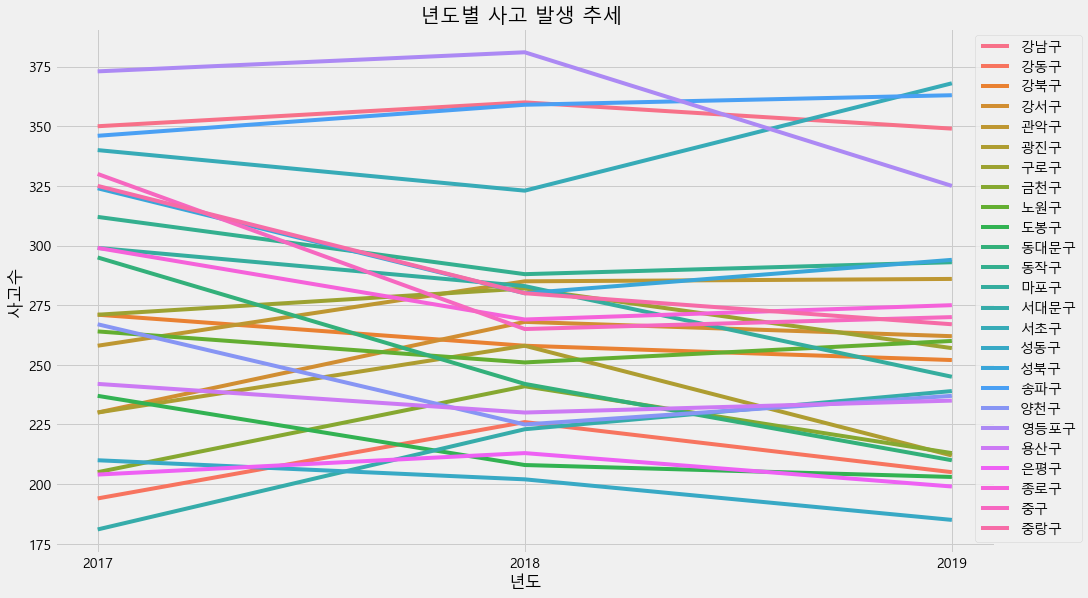

In [59]:
plt.figure(figsize=(15,9))
sns.lineplot(x="년도",y='사고수', hue='자치구', estimator=sum, data=df)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
plt.title('년도별 사고 발생 추세 ')

- 년도별로 사고수가 감소추세인 영등포구와 사고수 증가추세인 서초구가 대비되는 양상을 보임
- 영등포, 강남, 송파, 서초구는 3년 내내 사고 수 4위권

In [60]:
#2017년 기준 자치구별 사고수 
df[df['년도']==2017].groupby('자치구')['사고수'].sum().sort_values(ascending=False)

Series([], Name: 사고수, dtype: int64)

In [61]:
#2018년 기준 자치구별 사고수 
df[df['년도']==2018].groupby('자치구')['사고수'].sum().sort_values(ascending=False)

Series([], Name: 사고수, dtype: int64)

In [62]:
#2019년 기준 자치구별 사고수 
df[df['년도']==2019].groupby('자치구')['사고수'].sum().sort_values(ascending=False)

Series([], Name: 사고수, dtype: int64)

In [63]:
#사망자수, 중상자수, 부상자수, 경상자수 비교 
ab1=df.groupby('자치구')['사고수'].sum().sort_values(ascending=False)
ab2=df.groupby('자치구')['사망자수'].sum().sort_values(ascending=False)
ab3=df.groupby('자치구')['중상자수'].sum().sort_values(ascending=False)
ab4=df.groupby('자치구')['부상자수'].sum().sort_values(ascending=False)
ab5=df.groupby('자치구')['경상자수'].sum().sort_values(ascending=False)

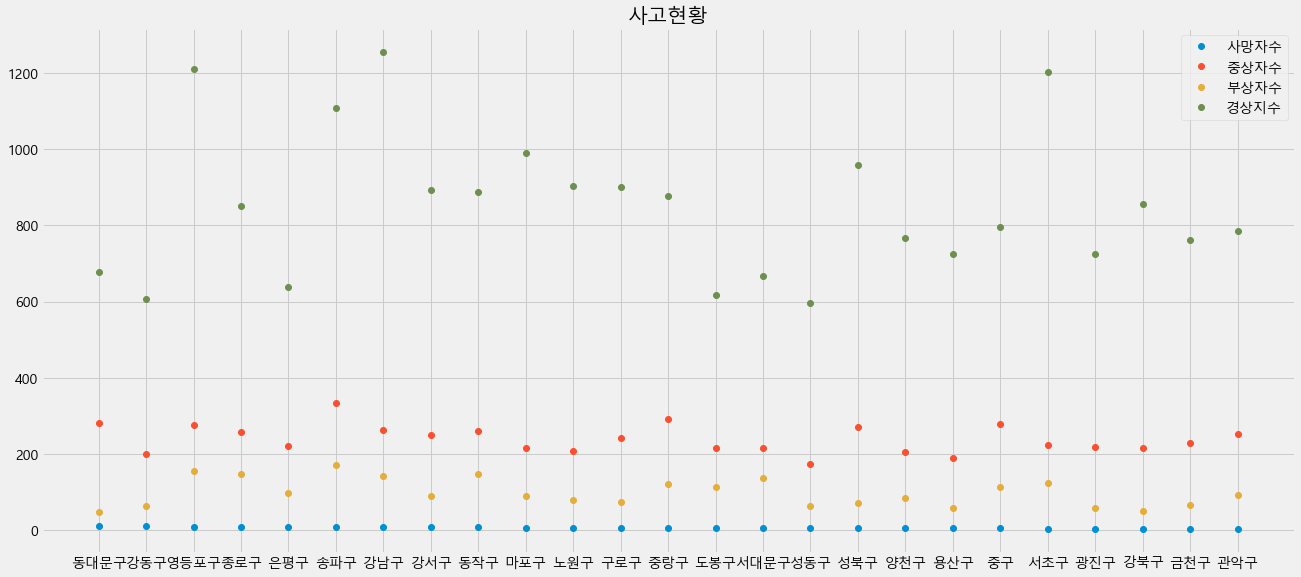

In [64]:
plt.figure(figsize=[20,9])
plt.plot(ab2,'o')
plt.plot(ab3,'o')
plt.plot(ab4,'o')
plt.plot(ab5,'o')
plt.legend(['사망자수','중상자수','부상자수','경상지수'])
plt.title('사고현황')
plt.show()

- 경상자수가 가장 많음 > 중상자수 > 부상자수 > 사망자수

### 월별

Text(0, 0.5, '사고 수')

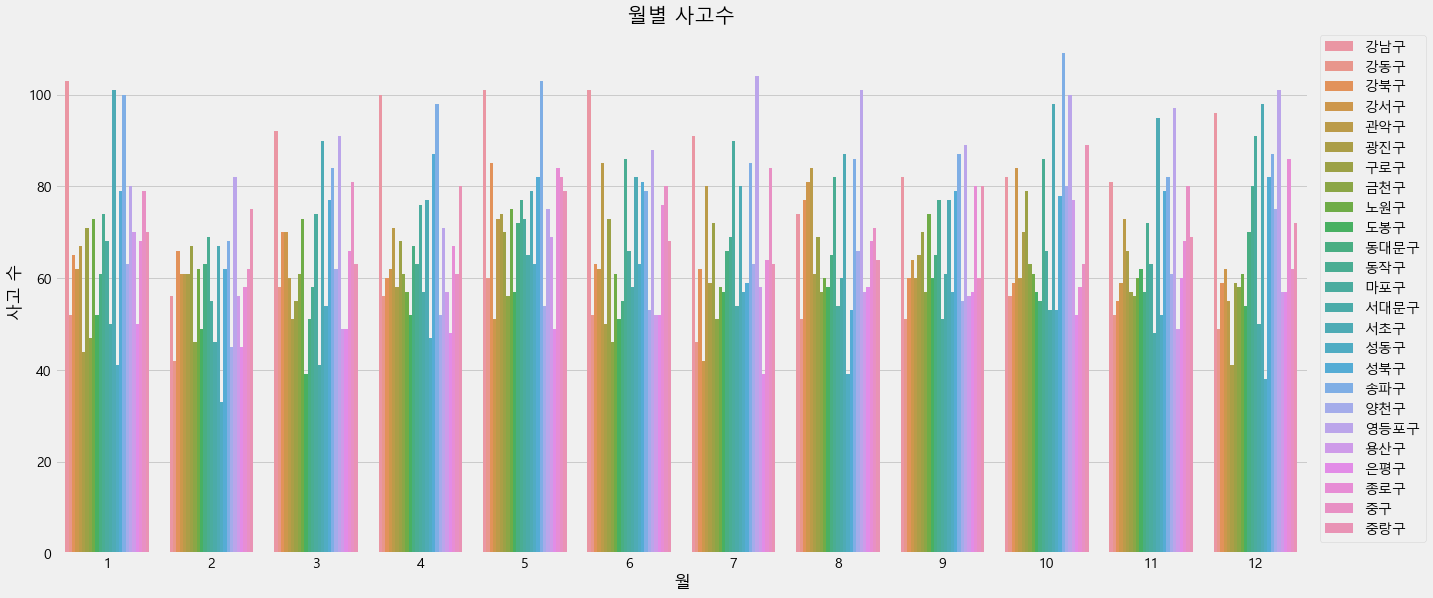

In [65]:
plt.figure(figsize=[20,9])
sns.countplot(data=df, x='월', hue='자치구')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
plt.title('월별 사고수')
plt.xlabel('월')
plt.ylabel('사고 수')

Text(0, 0.5, '사고 수')

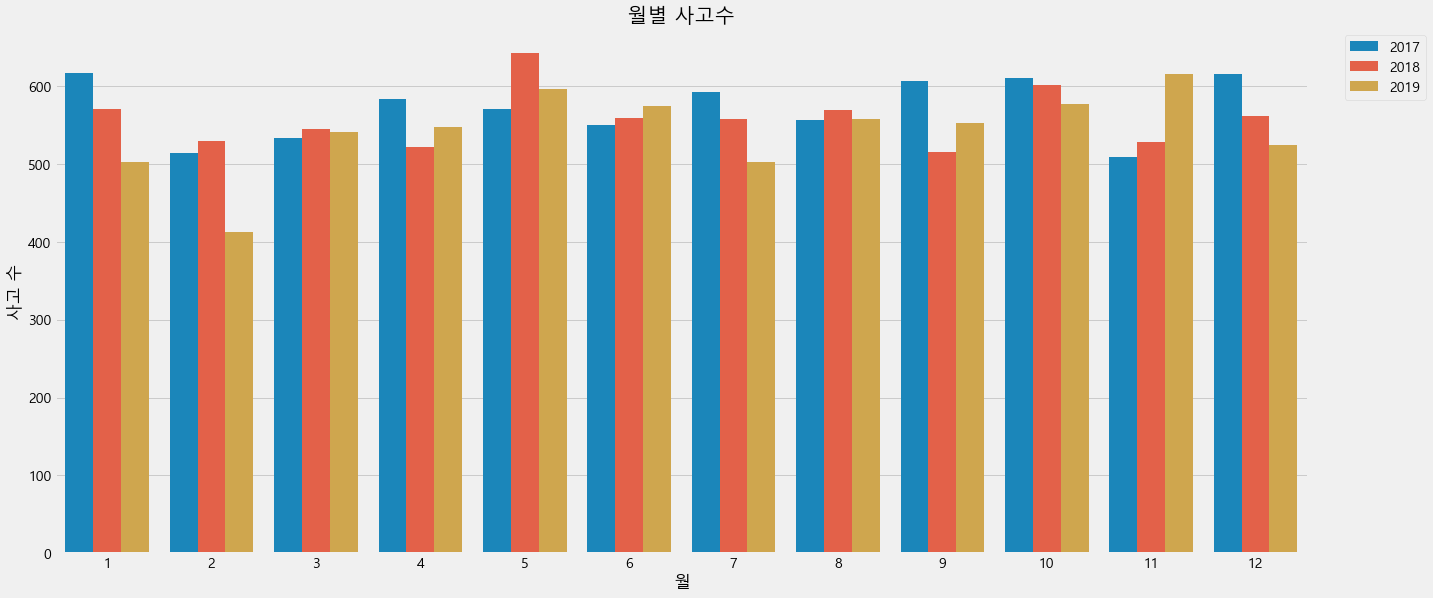

In [66]:
plt.figure(figsize=[20,9])
sns.countplot(data=df, x='월', hue='년도')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
plt.title('월별 사고수')
plt.xlabel('월')
plt.ylabel('사고 수')

- 5월이 총 사고 수 1808건으로 가장 많은 사고가 발생했으며
- 다음으로, 10월이 1788건, 12월이 1700건으로 뒤를 이음 
- 10월은 3년 내내 상위권에 해당함 교통사고에 주의

In [67]:
#2017년 기준 월별 사고수 
df[df['년도']==2017].groupby('월')['사고수'].sum().sort_values(ascending=False)

Series([], Name: 사고수, dtype: int64)

In [68]:
#2018년 기준 월별 사고수 
df[df['년도']==2018].groupby('월')['사고수'].sum().sort_values(ascending=False)

Series([], Name: 사고수, dtype: int64)

In [69]:
#2019년 기준 월별 사고수 
df[df['년도']==2019].groupby('월')['사고수'].sum().sort_values(ascending=False)

Series([], Name: 사고수, dtype: int64)

In [70]:
#총 사고수 순위 
df.groupby('월')['사고수'].sum().sort_values(ascending=False)

월
5     1808
10    1788
12    1700
1     1690
6     1683
8     1683
9     1674
4     1653
7     1653
11    1653
3     1619
2     1457
Name: 사고수, dtype: int64

### 요일별

Text(0, 0.5, '사고 수')

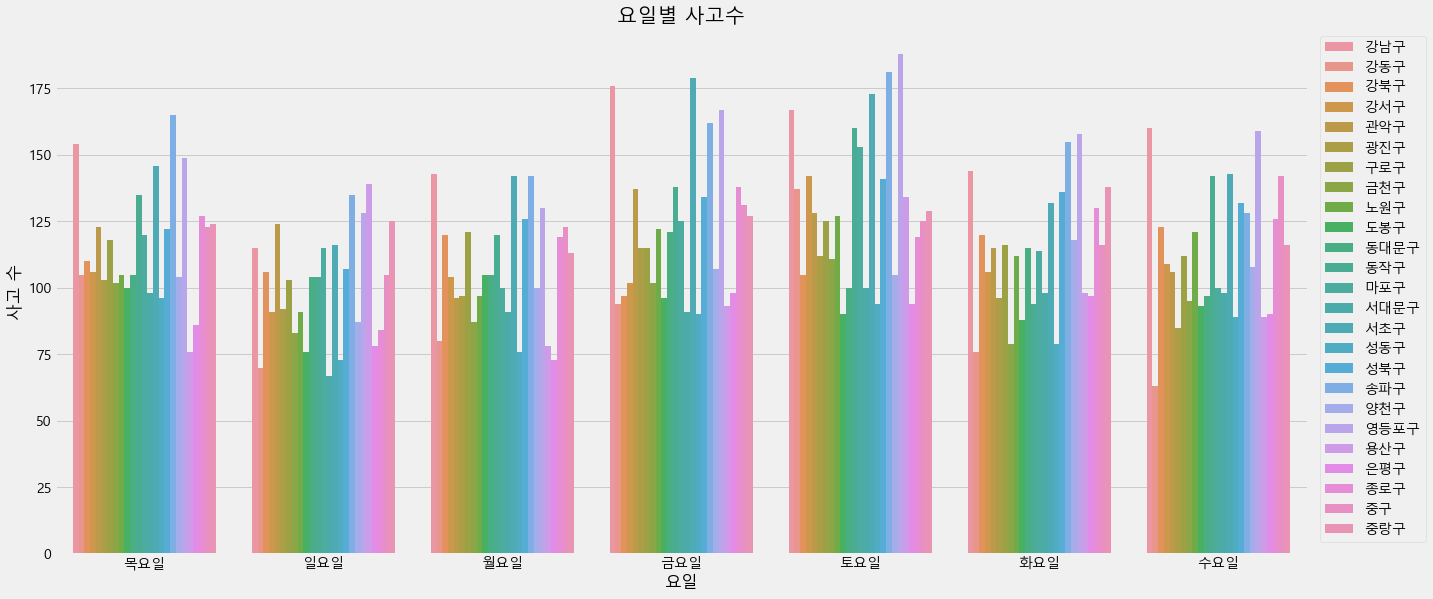

In [71]:
plt.figure(figsize=[20,9])
sns.countplot(data=df, x='요일', hue='자치구')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
plt.title('요일별 사고수')
plt.xlabel('요일')
plt.ylabel('사고 수')

Text(0, 0.5, '사고 수')

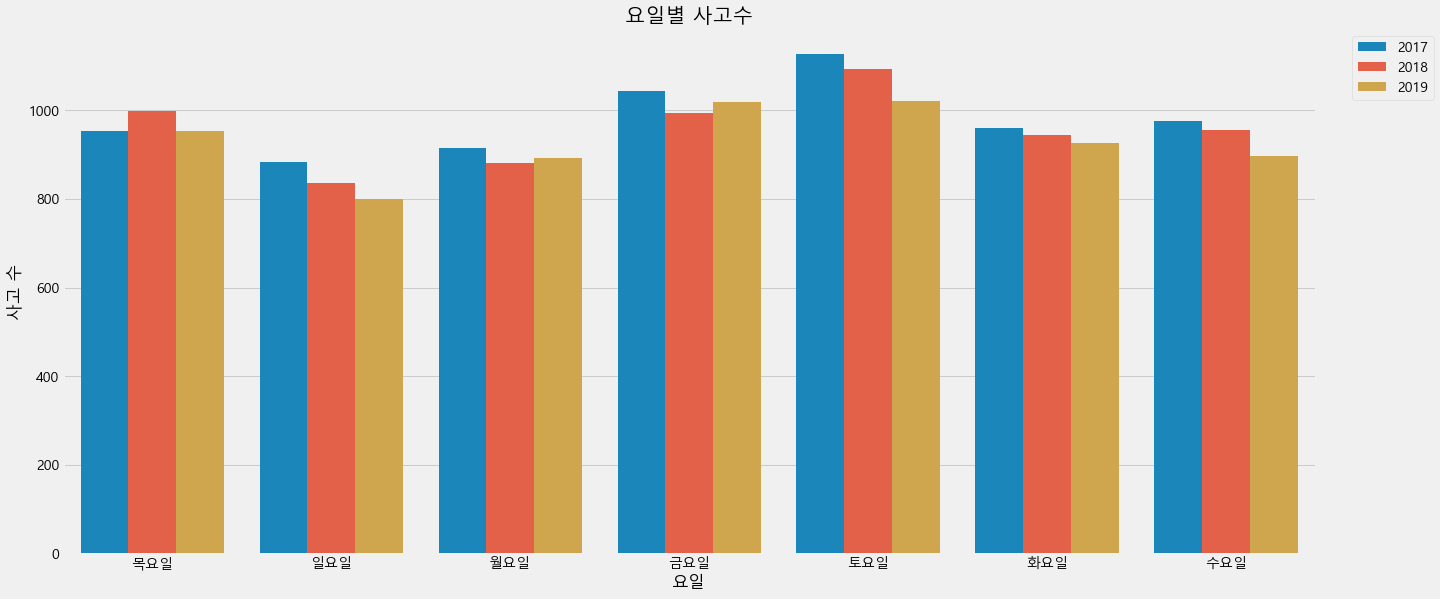

In [72]:
plt.figure(figsize=[20,9])
sns.countplot(data=df, x='요일', hue='년도')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
plt.title('요일별 사고수')
plt.xlabel('요일')
plt.ylabel('사고 수')

- 토요일에 사고 수 가장 많이 발생함 

In [73]:
#총 사고수 순위 
df.groupby('요일')['사고수'].sum().sort_values(ascending=False)

요일
토요일    3240
금요일    3057
목요일    2902
화요일    2830
수요일    2826
월요일    2688
일요일    2518
Name: 사고수, dtype: int64

### 시간대별

Text(0, 0.5, '사고 수')

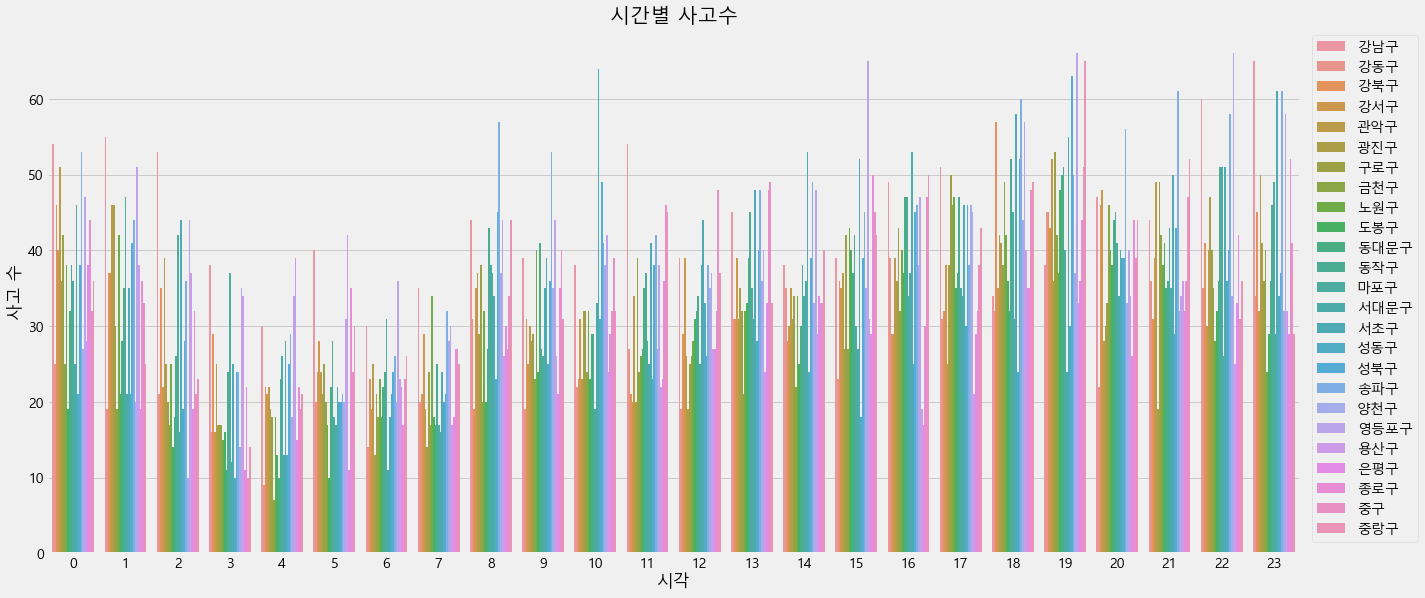

In [74]:
plt.figure(figsize=[20,9])
sns.countplot(data=df, x='시각', hue='자치구')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
plt.title('시간별 사고수')
plt.xlabel('시각')
plt.ylabel('사고 수')

Text(0, 0.5, '사고 수')

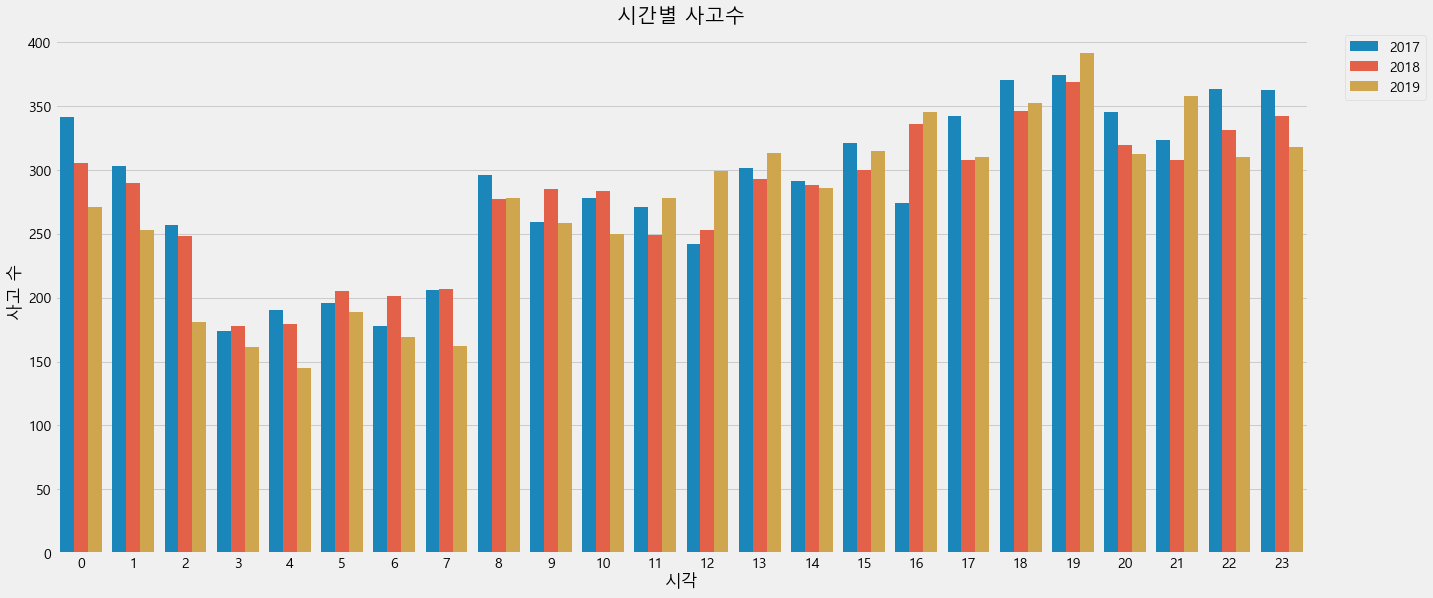

In [75]:
plt.figure(figsize=[20,9])
sns.countplot(data=df, x='시각', hue='년도')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
plt.title('시간별 사고수')
plt.xlabel('시각')
plt.ylabel('사고 수')

- 19시가 1134건으로 사고수가 가장 높은 시간대
- 그 뒤로 18시가 1,068건, 23시 1022건, 22시 1,004건
- 18-24 주로 오전보다 퇴근~밤 시간대에 사고가 많이 발생함

In [76]:
#총 사고수 순위 
df.groupby('시각')['사고수'].sum().sort_values(ascending=False)

시각
19    1134
18    1068
23    1022
22    1004
21     989
20     976
17     960
16     955
15     936
0      917
13     907
14     865
8      851
1      846
10     811
9      802
11     798
12     794
2      686
5      590
7      575
6      548
4      514
3      513
Name: 사고수, dtype: int64

## (2) 인적특성

### 가해자

Text(0, 0.5, '사고 수')

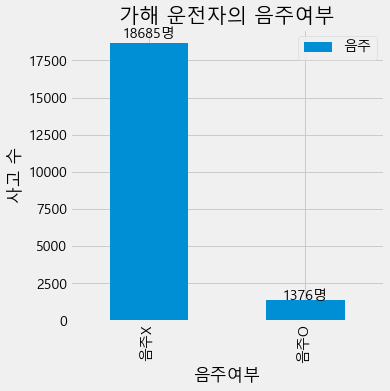

In [77]:
plt.figure(figsize=[5,5])
ax6=df['음주'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.legend(loc='upper right',bbox_to_anchor=(1.0, 1))
for p in ax6.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax6.annotate("%.0f명"%(height), (left+width/2, height*1.02), ha='center')
    plt.title('가해 운전자의 음주여부')
plt.xlabel('음주여부')
plt.ylabel('사고 수')

Text(0.5, 0, '음주여부')

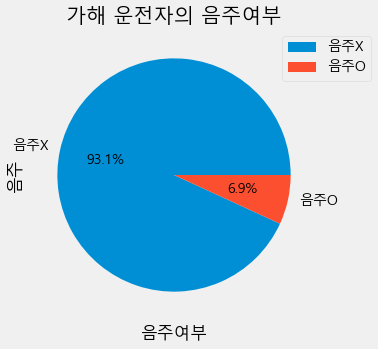

In [78]:
plt.figure(figsize=[5,5])
ax6=df['음주'].value_counts().sort_values(ascending=False).plot(kind='pie', autopct='%0.1f%%')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))
plt.title('가해 운전자의 음주여부')
plt.xlabel('음주여부')

- 사고 낸 가해 운전자의 음주여부를 보면 음주자 1376명, 비음주자 18685명으로 비음주자가 전체 사고의 약 93%를 차지함.

In [79]:
#음주여부별 사고수
df.groupby('음주')['사고수'].sum().sort_values(ascending=False)

음주
음주X    18685
음주O     1376
Name: 사고수, dtype: int64

Text(0, 0.5, '사고 수')

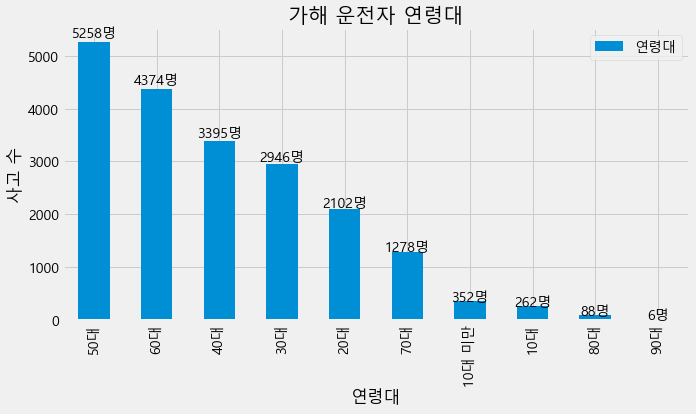

In [80]:
plt.figure(figsize=[10,5])
ax4=df['연령대'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.legend(loc='upper right',bbox_to_anchor=(1.0, 1))
for p in ax4.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax4.annotate("%.0f명"%(height), (left+width/2, height*1.02), ha='center')
plt.title('가해 운전자 연령대')
plt.xlabel('연령대')
plt.ylabel('사고 수')

- 가해 운전자의 연령대는 50대 > 60대 > 40대 > 30대 > 20대 순으로 나타남

Text(0, 0.5, '사고 수')

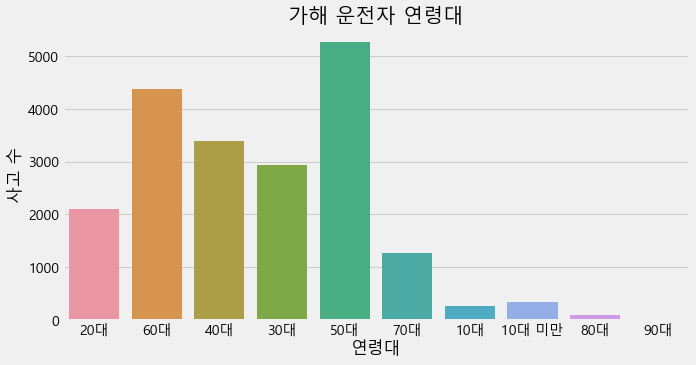

In [81]:
plt.figure(figsize=[10,5])
sns.countplot(data=df, x='연령대')
plt.title('가해 운전자 연령대')
plt.xlabel('연령대')
plt.ylabel('사고 수')

Text(0, 0.5, '사고 수')

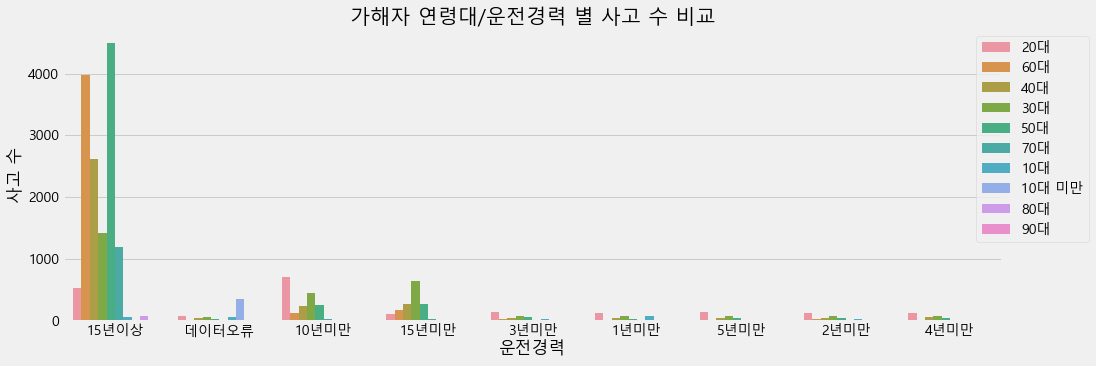

In [82]:
plt.figure(figsize=[15,5])
sns.countplot(data=df, x='경력', hue='연령대')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.title('가해자 연령대/운전경력 별 사고 수 비교')
plt.xlabel('운전경력')
plt.ylabel('사고 수')

- 가해 운전자의 주요 운전경력을 보면 15년이상이 압도적으로 높게 나타남.

Text(0, 0.5, '사고 수')

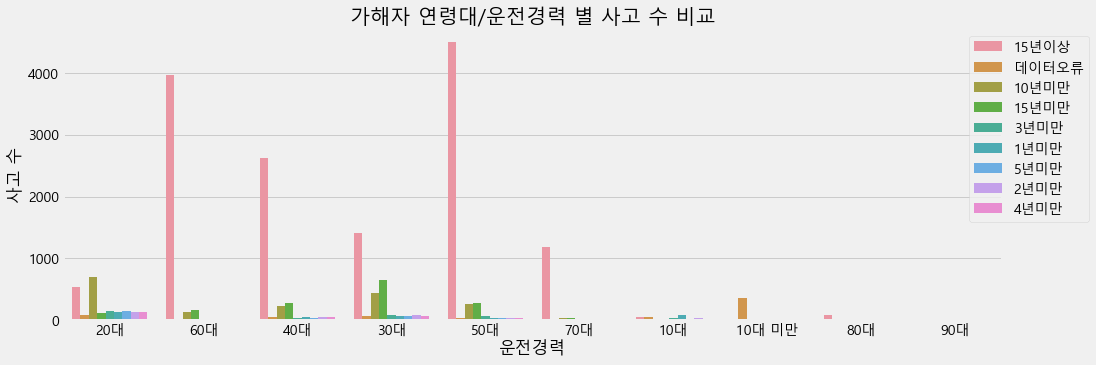

In [83]:
plt.figure(figsize=[15,5])
sns.countplot(data=df, x='연령대', hue='경력')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.title('가해자 연령대/운전경력 별 사고 수 비교')
plt.xlabel('운전경력')
plt.ylabel('사고 수')

### 피해자

Text(0, 0.5, '사고 수')

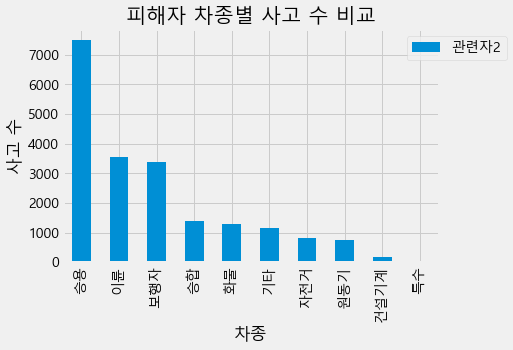

In [84]:
df['관련자2'].value_counts().plot(kind='bar')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))
plt.title('피해자 차종별 사고 수 비교')
plt.xlabel('차종')
plt.ylabel('사고 수')

- 피해자의 차종은 승용차 > 이륜차 > 보행자 > 승합차 순으로 나타남

## (3) 사고 다발 장소

In [85]:
df['지점명'].value_counts().sort_values(ascending=False)

성화의료재단대한병원     137
KOTRA빌딩앞사거리    135
종암사거리          121
영등포역앞삼거리       117
트럭터미널앞사거리      110
              ... 
목동청소년수련관사거리      5
정의여중입구교차로        5
염천교동단사거리         5
응암역앞사거리          5
수유사거리            5
Name: 지점명, Length: 553, dtype: int64

Text(0, 0.5, '발생 빈도')

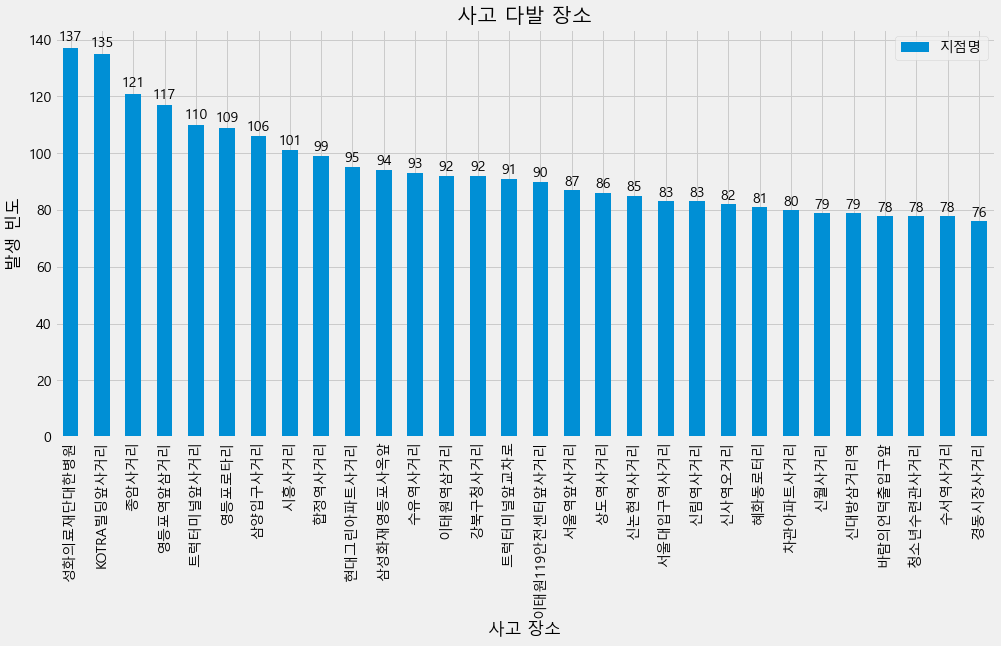

In [86]:
#주요 사고 다발지역 Top30
plt.figure(figsize=[15,7])
ax=df['지점명'].value_counts().head(30).sort_values(ascending=False).plot(kind='bar', title='사고 다발 장소')
plt.legend(loc='upper right',bbox_to_anchor=(1.0, 1))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f"%(height), (left+width/2, height*1.02), ha='center')
plt.xlabel('사고 장소')
plt.ylabel('발생 빈도')

Text(0, 0.5, '발생 빈도')

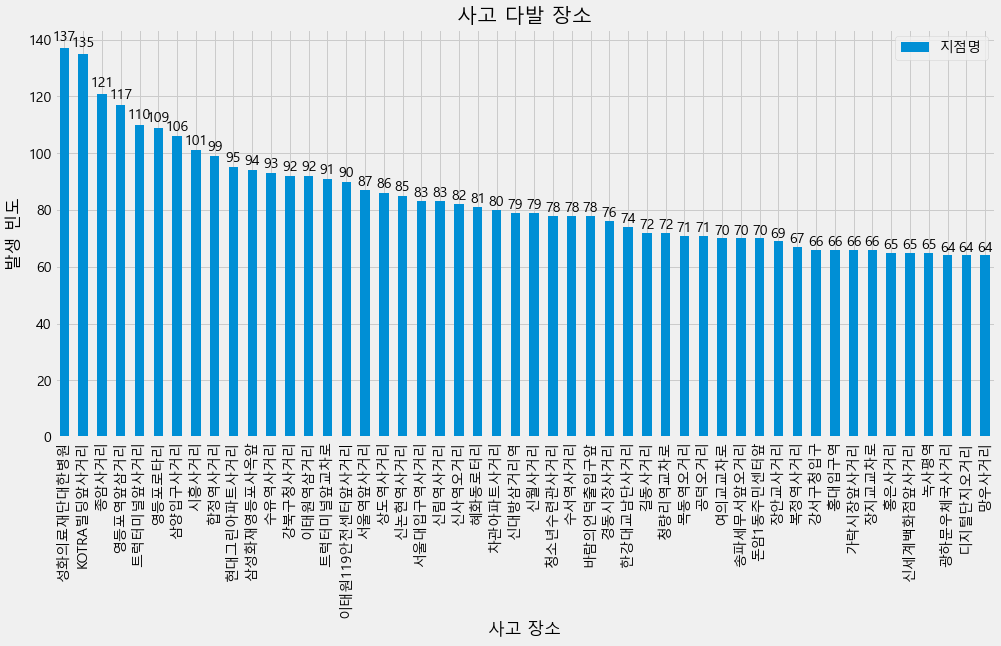

In [87]:
#주요 사고 다발지역 Top50
plt.figure(figsize=[15,7])
ax=df['지점명'].value_counts().head(50).sort_values(ascending=False).plot(kind='bar', title='사고 다발 장소')
plt.legend(loc='upper right',bbox_to_anchor=(1.0, 1))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f"%(height), (left+width/2, height*1.02), ha='center')
plt.xlabel('사고 장소')
plt.ylabel('발생 빈도')

In [88]:
df[df['지점명']=='종암사거리']

,년도,월,일,요일,시각,사고등급,사망자수,중상자수,경상자수,부상자수,...,사고유형2,법규위반,도로종류,지점명,위도,경도,자치구,Unnamed: 28,연령대,사고수
13131,2017,1,25,수요일,8,경상사고,0,0,1,0,...,측면직각충돌,안전거리미확보,특별광역시도,종암사거리,37.603226,127.032213,성북구,NaN,20대,1
13132,2017,1,27,금요일,19,중상사고,0,6,0,0,...,정면충돌,신호위반,특별광역시도,종암사거리,37.603226,127.032213,성북구,NaN,60대,1
13133,2017,2,28,화요일,20,경상사고,0,0,1,0,...,차대차-기타,안전거리미확보,특별광역시도,종암사거리,37.603226,127.032213,성북구,NaN,70대,1
13134,2017,3,17,금요일,11,경상사고,0,0,2,0,...,추돌(진행중),안전운전불이행,특별광역시도,종암사거리,37.603226,127.032213,성북구,NaN,60대,1
13135,2017,3,2,목요일,23,중상사고,0,1,3,0,...,정면충돌,안전거리미확보,특별광역시도,종암사거리,37.603226,127.032213,성북구,NaN,20대,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13247,2017,6,12,월요일,16,경상사고,0,0,1,0,...,측면직각충돌,안전거리미확보,특별광역시도,종암사거리,37.603226,127.032213,성북구,NaN,30대,1
13248,2017,12,4,월요일,11,경상사고,0,0,2,0,...,측면직각충돌,안전거리미확보,특별광역시도,종암사거리,37.603226,127.032213,성북구,NaN,50대,1
13249,2018,11,18,일요일,11,경상사고,0,0,1,0,...,차대사람-기타,안전운전불이행,특별광역시도,종암사거리,37.603226,127.032213,성북구,NaN,40대,1
13250,2019,3,14,목요일,8,경상사고,0,0,2,0,...,추돌(진행중),안전운전불이행,특별광역시도,종암사거리,37.603226,127.032213,성북구,NaN,60대,1


In [89]:
df[df['지점명']=='KOTRA빌딩앞사거리']

,년도,월,일,요일,시각,사고등급,사망자수,중상자수,경상자수,부상자수,...,사고유형2,법규위반,도로종류,지점명,위도,경도,자치구,Unnamed: 28,연령대,사고수
10794,2017,2,16,목요일,9,경상사고,0,0,2,1,...,측면직각충돌,신호위반,특별광역시도,KOTRA빌딩앞사거리,40.762028,-73.970995,서초구,NaN,60대,1
10795,2017,2,28,화요일,13,경상사고,0,0,2,0,...,차대차-기타,안전거리미확보,특별광역시도,KOTRA빌딩앞사거리,40.762028,-73.970995,서초구,NaN,20대,1
10796,2017,3,3,금요일,8,중상사고,0,1,2,0,...,측면직각충돌,차로위반,특별광역시도,KOTRA빌딩앞사거리,40.762028,-73.970995,서초구,NaN,30대,1
10797,2017,4,28,금요일,0,중상사고,0,1,0,0,...,정면충돌,신호위반,특별광역시도,KOTRA빌딩앞사거리,40.762028,-73.970995,서초구,NaN,40대,1
10798,2017,4,12,수요일,23,경상사고,0,0,1,1,...,측면직각충돌,안전거리미확보,특별광역시도,KOTRA빌딩앞사거리,40.762028,-73.970995,서초구,NaN,50대,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10924,2019,3,16,토요일,21,부상사고,0,0,0,1,...,측면직각충돌,안전거리미확보,특별광역시도,KOTRA빌딩앞사거리,40.762028,-73.970995,서초구,NaN,20대,1
10925,2019,4,17,수요일,10,경상사고,0,0,1,0,...,차대차-기타,안전운전불이행,특별광역시도,KOTRA빌딩앞사거리,40.762028,-73.970995,서초구,NaN,60대,1
10926,2019,10,3,목요일,23,경상사고,0,0,3,0,...,추돌(진행중),안전운전불이행,특별광역시도,KOTRA빌딩앞사거리,40.762028,-73.970995,서초구,NaN,30대,1
10927,2019,11,16,토요일,14,중상사고,0,1,0,0,...,측면직각충돌,불법유턴,특별광역시도,KOTRA빌딩앞사거리,40.762028,-73.970995,서초구,NaN,60대,1


In [90]:
df[df['지점명']=='성화의료재단대한병원']

,년도,월,일,요일,시각,사고등급,사망자수,중상자수,경상자수,부상자수,...,사고유형2,법규위반,도로종류,지점명,위도,경도,자치구,Unnamed: 28,연령대,사고수
2230,2017,1,31,화요일,0,중상사고,0,1,0,0,...,횡단중,안전운전불이행,특별광역시도,성화의료재단대한병원,37.63538,127.022677,강북구,NaN,60대,1
2231,2017,1,25,수요일,9,경상사고,0,0,1,0,...,측면직각충돌,안전운전불이행,특별광역시도,성화의료재단대한병원,37.63538,127.022677,강북구,NaN,50대,1
2232,2017,1,15,일요일,18,경상사고,0,0,1,0,...,측면직각충돌,신호위반,특별광역시도,성화의료재단대한병원,37.63538,127.022677,강북구,NaN,30대,1
2233,2017,1,2,월요일,20,중상사고,0,1,0,0,...,차대차-기타,신호위반,특별광역시도,성화의료재단대한병원,37.63538,127.022677,강북구,NaN,60대,1
2234,2017,1,26,목요일,23,경상사고,0,0,1,0,...,차대사람-기타,안전운전불이행,특별광역시도,성화의료재단대한병원,37.63538,127.022677,강북구,NaN,20대,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362,2018,2,1,목요일,19,경상사고,0,0,2,0,...,추돌(진행중),안전거리미확보,특별광역시도,성화의료재단대한병원,37.63538,127.022677,강북구,NaN,20대,1
2363,2019,1,9,수요일,20,경상사고,0,0,1,0,...,횡단중,보행자보호의무위반,특별광역시도,성화의료재단대한병원,37.63538,127.022677,강북구,NaN,50대,1
2364,2019,2,27,수요일,11,경상사고,0,0,1,0,...,보도통행중,기타,특별광역시도,성화의료재단대한병원,37.63538,127.022677,강북구,NaN,50대,1
2365,2019,3,2,토요일,6,경상사고,0,0,1,0,...,차대사람-기타,보행자보호의무위반,특별광역시도,성화의료재단대한병원,37.63538,127.022677,강북구,NaN,50대,1


In [91]:
#사고 다발 장소 순위 
df.groupby('지점명')['사고수'].sum().sort_values(ascending=False).head(30)

지점명
성화의료재단대한병원        137
KOTRA빌딩앞사거리       135
종암사거리             121
영등포역앞삼거리          117
트럭터미널앞사거리         110
영등포로타리            109
삼양입구사거리           106
시흥사거리             101
합정역사거리             99
현대그린아파트사거리         95
삼성화재영등포사옥앞         94
수유역사거리             93
이태원역삼거리            92
강북구청사거리            92
트럭터미널앞교차로          91
이태원119안전센터앞사거리     90
서울역앞사거리            87
상도역사거리             86
신논현역사거리            85
서울대입구역사거리          83
신림역사거리             83
신사역오거리             82
혜화동로터리             81
차관아파트사거리           80
신대방삼거리역            79
신월사거리              79
수서역사거리             78
바람의언덕출입구앞          78
청소년수련관사거리          78
경동시장사거리            76
Name: 사고수, dtype: int64

- 성화의료재단대한병원 > KOTRA빌딩앞사거리 > 종암사거리 > 트럭터미널앞사거리 > 영등포로타리 등의 순으로 사고 다발 지역 

In [92]:
#특정구 사고 다발 장소
aa=df[df['자치구']=='강남구']

Text(0.5, 1.0, 'OO구 사고 다발 장소')

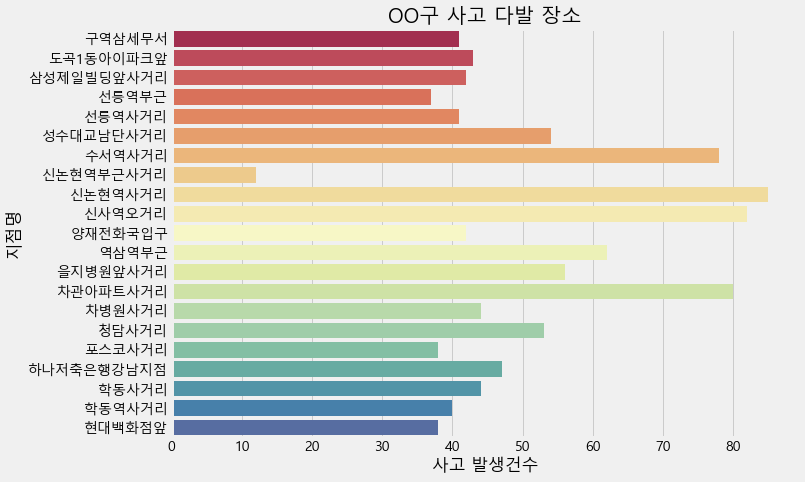

In [93]:
plt.figure(figsize=[10,7])
sns.countplot(data=aa, y='지점명',palette='Spectral').set_xlabel('사고 발생건수')
plt.title('OO구 사고 다발 장소')

## (4) 사고 유형별

In [94]:
df['사고유형1'].value_counts()

차대차     16015
차대사람     3508
차량단독      538
Name: 사고유형1, dtype: int64

Text(0, 0.5, '빈도')

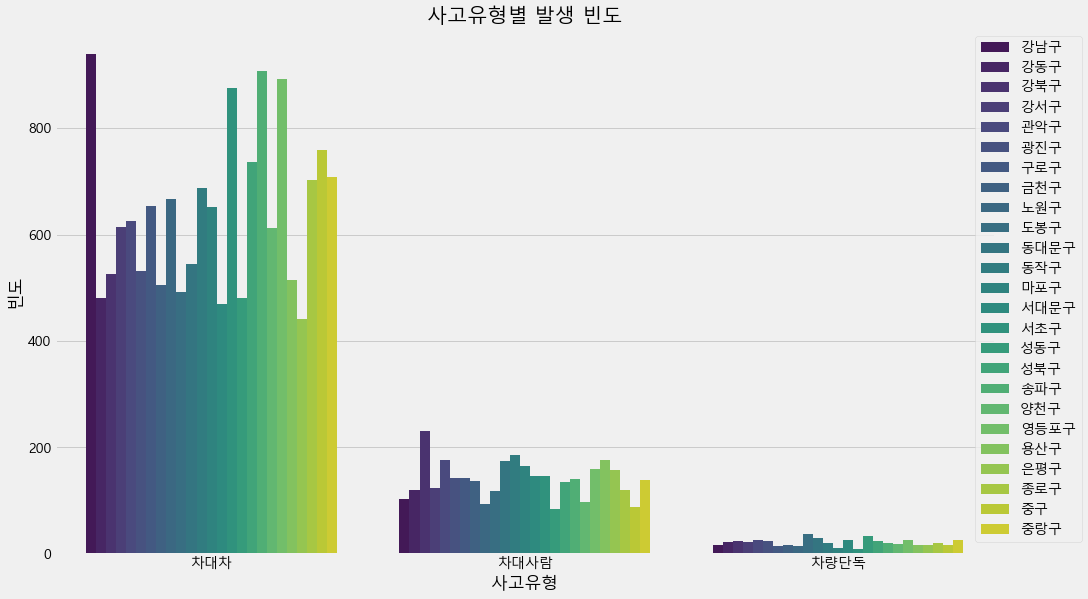

In [95]:
plt.figure(figsize=[15,9])
sns.countplot(data=df, x='사고유형1',hue='자치구', palette='viridis')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.title('사고유형별 발생 빈도')
plt.xlabel('사고유형')
plt.ylabel('빈도')

- 사고유형을 보면 차대차 > 차대사람 > 차량단독 순으로 차대차사고가 발생 빈도가 높게 나타남.

Text(0.5, 0, '사고유형')

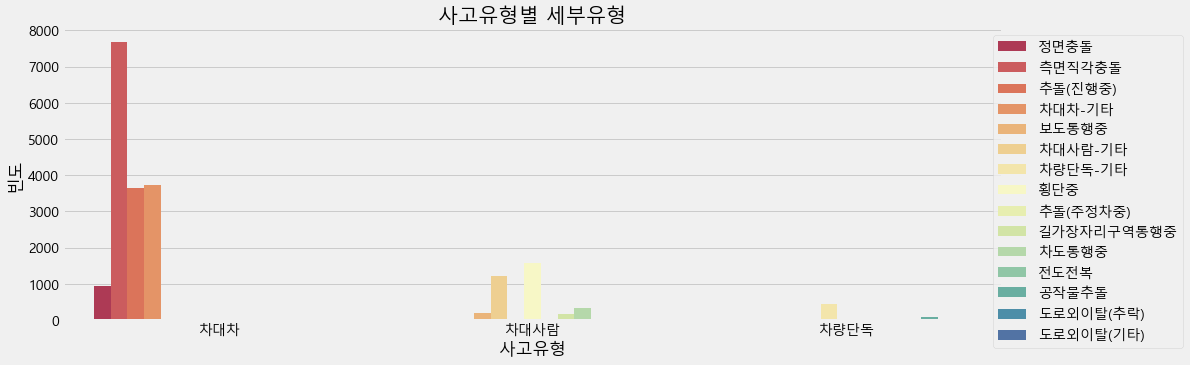

In [96]:
plt.figure(figsize=(15,5))
sns.countplot(x="사고유형1", hue="사고유형2", data=df, palette='Spectral')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('사고유형별 세부유형')
plt.ylabel('빈도')
plt.xlabel('사고유형')

- 발생 빈도가 높은 차대차사고의 세부 유형을 보면 측면직각충돌이 7,674건으로 압도적으로 높게 나타남. 

In [97]:
#총 사고수 순위 
df[df['사고유형1']=='차대차']['사고유형2'].value_counts()

측면직각충돌      7674
차대차-기타      3723
추돌(진행중)     3649
정면충돌         943
추돌(주정차중)      26
Name: 사고유형2, dtype: int64

In [98]:
#차대차
set(df[df['사고유형1']=='차대차']['사고유형2'])

{'정면충돌', '차대차-기타', '추돌(주정차중)', '추돌(진행중)', '측면직각충돌'}

In [99]:
#차대사람
set(df[df['사고유형1']=='차대사람']['사고유형2'])

{'길가장자리구역통행중', '보도통행중', '차대사람-기타', '차도통행중', '횡단중'}

In [100]:
#차량단독
set(df[df['사고유형1']=='차량단독']['사고유형2'])

{'공작물추돌', '도로외이탈(기타)', '도로외이탈(추락)', '전도전복', '차량단독-기타'}

In [101]:
df['사고유형2'].value_counts().sort_values(ascending=False)

측면직각충돌        7674
차대차-기타        3723
추돌(진행중)       3649
횡단중           1585
차대사람-기타       1214
정면충돌           943
차량단독-기타        444
차도통행중          339
보도통행중          205
길가장자리구역통행중     165
공작물추돌           70
추돌(주정차중)        26
전도전복            22
도로외이탈(추락)        1
도로외이탈(기타)        1
Name: 사고유형2, dtype: int64

Text(0, 0.5, '빈도')

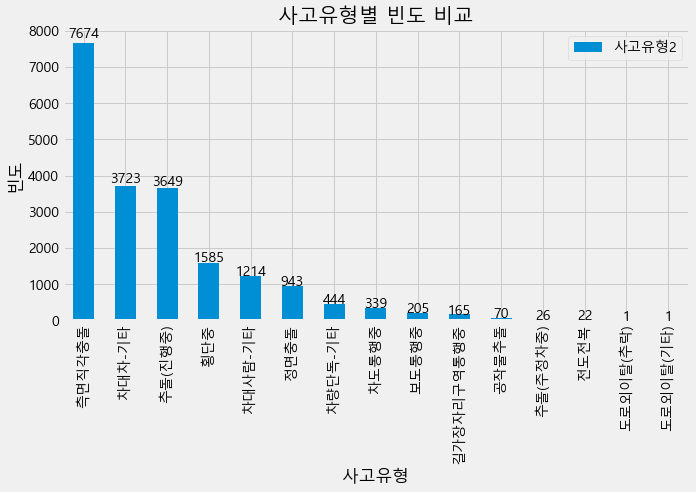

In [102]:
plt.figure(figsize=[10,5])
ax5=df['사고유형2'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.legend(loc='upper right',bbox_to_anchor=(1.0, 1))
for p in ax5.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax5.annotate("%.0f"%(height), (left+width/2, height*1.02), ha='center')
plt.title('사고유형별 빈도 비교')
plt.xlabel('사고유형')
plt.ylabel('빈도')

## (5) 사고등급별

Text(0.5, 1.0, '사고등급별 발생건수 비교')

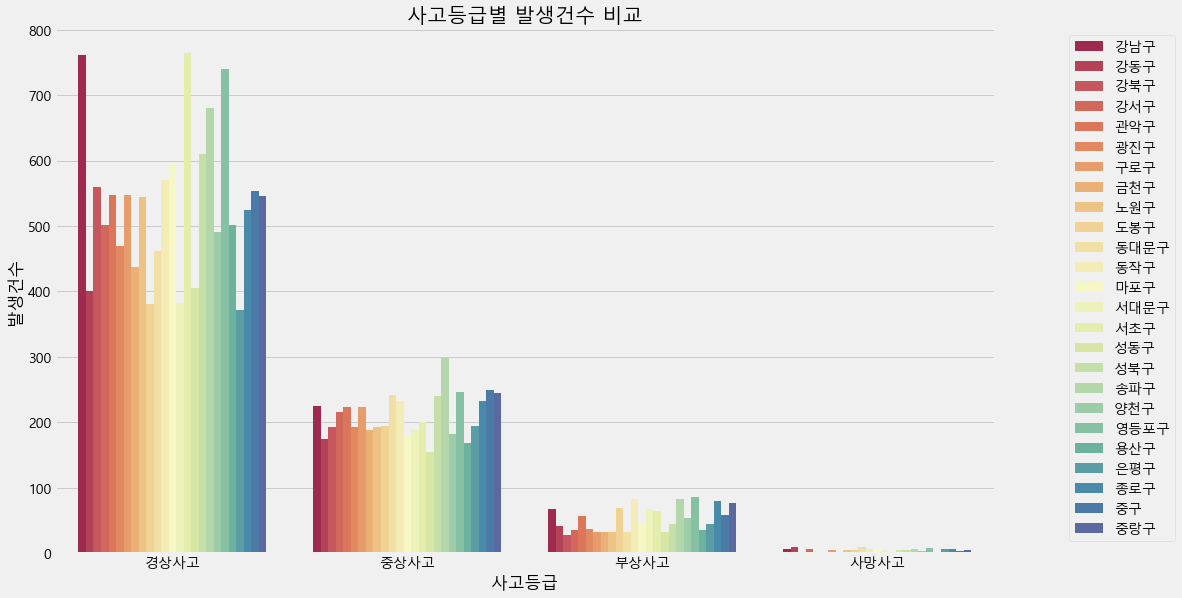

In [103]:
plt.figure(figsize=(15,9))
sns.countplot(x="사고등급",hue='자치구',data=df, palette='Spectral').set_ylabel("발생건수")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('사고등급별 발생건수 비교')

- 경상사고 > 중상사고 > 부상사고 > 사망사고 순으로 나타남. 
- 경상사고가 총 13,348건으로 압도적으로 높게 발생함.

In [104]:
df['사고등급'].value_counts().sort_values(ascending=False)

경상사고    13348
중상사고     5278
부상사고     1318
사망사고      117
Name: 사고등급, dtype: int64

Text(0, 0.5, '사고 발생 건수')

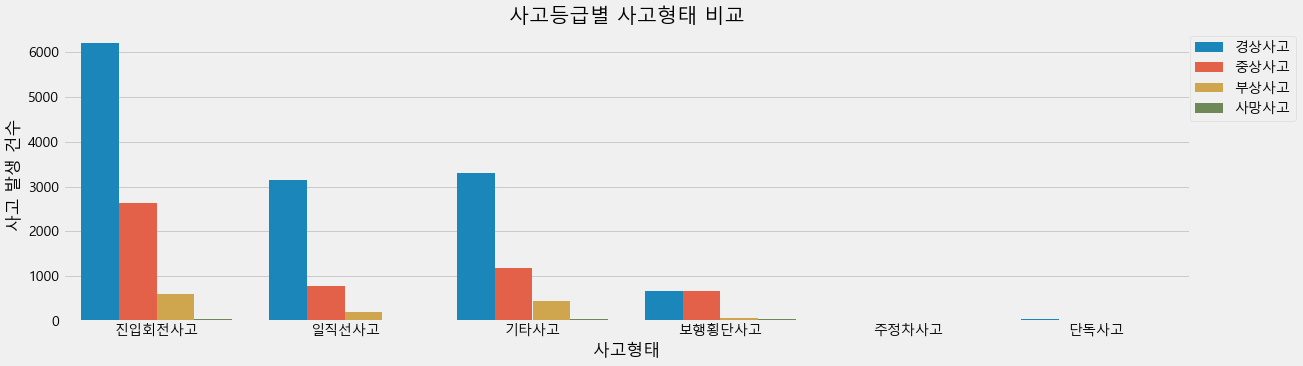

In [105]:
plt.figure(figsize=[18,5])
sns.countplot(data=df, x='사고형태', hue='사고등급')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.title('사고등급별 사고형태 비교')
plt.xlabel('사고형태')
plt.ylabel('사고 발생 건수')

- 진입회전사고가 총 9,459건으로 가장 많이 발생함.

In [106]:
df['사고형태'].value_counts().sort_values(ascending=False)

진입회전사고    9459
기타사고      4963
일직선사고     4119
보행횡단사고    1424
단독사고        70
주정차사고       26
Name: 사고형태, dtype: int64

## (6) 법규위반

Text(0, 0.5, '빈도')

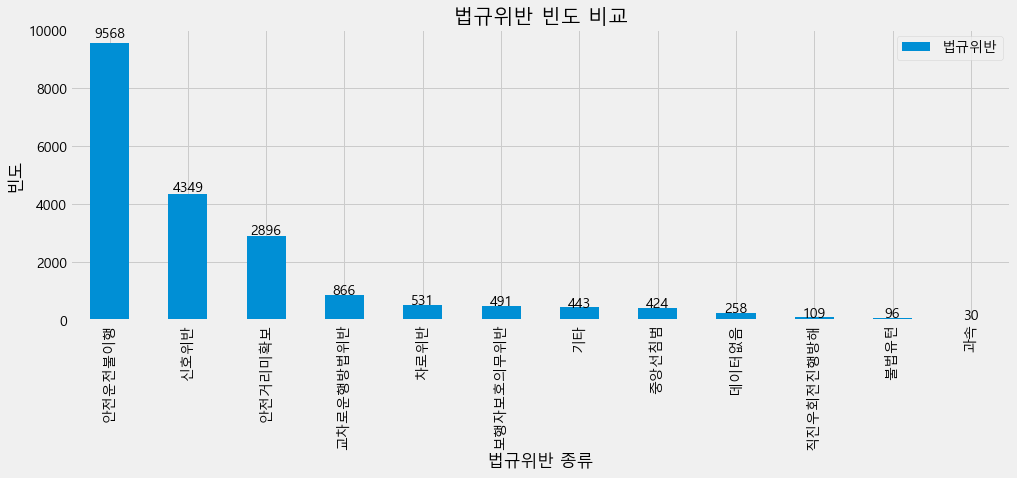

In [107]:
plt.figure(figsize=[15,5])
ax2=df['법규위반'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.legend(loc='upper right',bbox_to_anchor=(1.0, 1))
for p in ax2.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax2.annotate("%.0f"%(height), (left+width/2, height*1.02), ha='center')
plt.title('법규위반 빈도 비교')
plt.xlabel('법규위반 종류')
plt.ylabel('빈도')

Text(0.5, 1.0, '법규위반 빈도 비교')

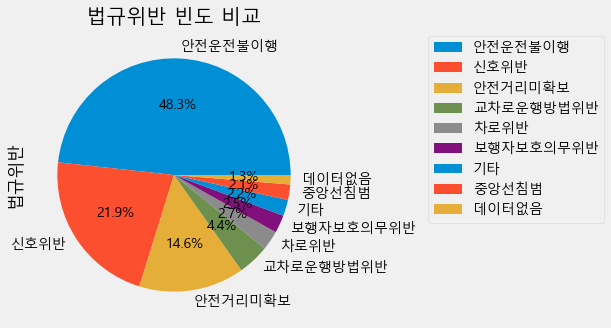

In [108]:
plt.figure(figsize=[5,5])
df['법규위반'].value_counts().head(9).sort_values(ascending=False).plot(kind='pie', autopct='%0.1f%%')
plt.legend(loc='upper right',bbox_to_anchor=(2.0, 1))
plt.title('법규위반 빈도 비교')

Text(0, 0.5, '빈도')

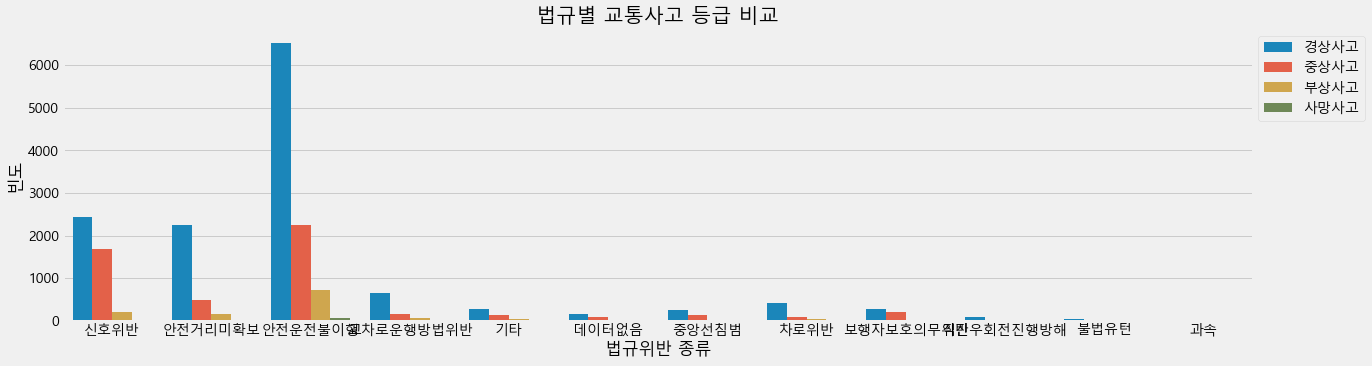

In [109]:
plt.figure(figsize=[19,5])
sns.countplot(data=df, x='법규위반', hue='사고등급')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.title('법규별 교통사고 등급 비교')
plt.xlabel('법규위반 종류')
plt.ylabel('빈도')

- 안전운전불이행이 9,568건으로 가장 높게 나타났으며 다음으로 신호위반이 4,349건 안전거리미확보가 2,896건 등으로 나타남.

In [110]:
df['법규위반'].value_counts().sort_values(ascending=False)

안전운전불이행      9568
신호위반         4349
안전거리미확보      2896
교차로운행방법위반     866
차로위반          531
보행자보호의무위반     491
기타            443
중앙선침범         424
데이터없음         258
직진우회전진행방해     109
불법유턴           96
과속             30
Name: 법규위반, dtype: int64

## (7) 기상상태

Text(0, 0.5, '빈도')

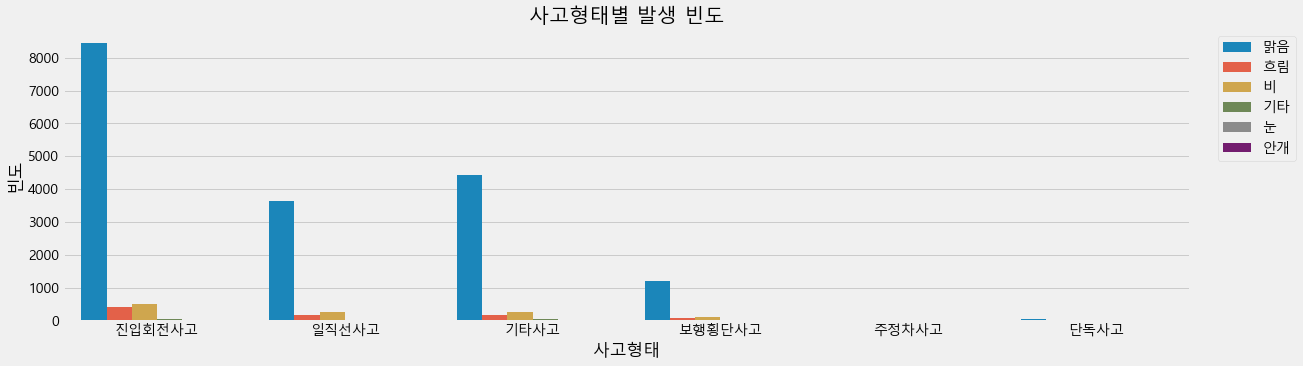

In [111]:
plt.figure(figsize=[18,5])
sns.countplot(data=df, x='사고형태', hue='기상상태')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.title('사고형태별 발생 빈도')
plt.xlabel('사고형태')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

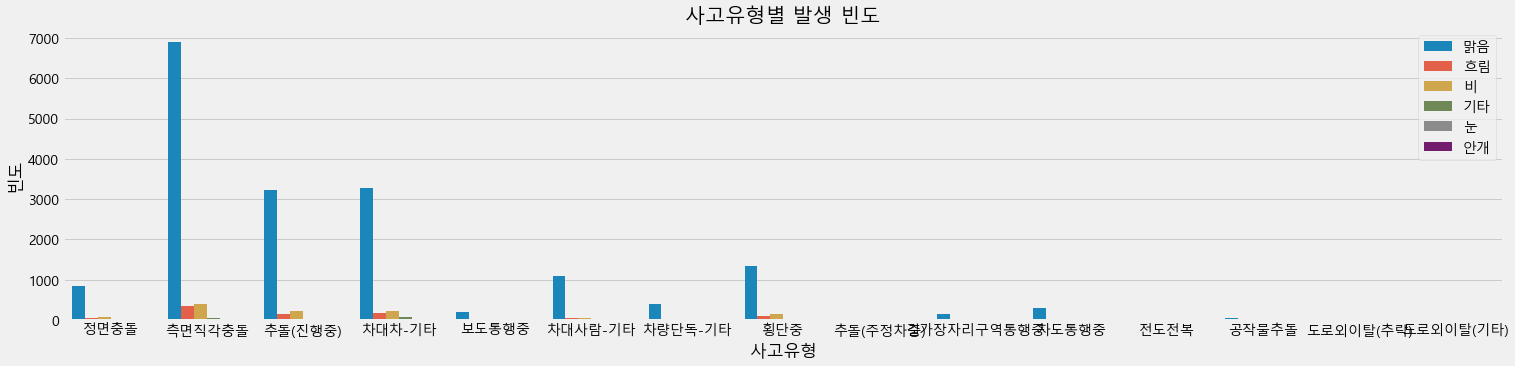

In [112]:
plt.figure(figsize=[23,5])
sns.countplot(data=df, x='사고유형2', hue='기상상태')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1))
plt.title('사고유형별 발생 빈도')
plt.xlabel('사고유형')
plt.ylabel('빈도')

- 기상상태가 맑음 일때 사고가 가장 많이 발생하였음(맑은 날이 그렇지 않은 날에 비해 상대적으로 많기도 하고, 맑은 날 차를 끌고 나갈 확률이 높음)
- 기상상태의 맑고 흐림 정도가 교통사고에 크게 영향을 주는 요인으로 보기 어려움

In [113]:
df['기상상태'].value_counts().sort_values(ascending=False)

맑음    17804
비      1144
흐림      874
기타      173
눈        65
안개        1
Name: 기상상태, dtype: int64

## (8) 차종/용도별

In [114]:
set(df['종별'])

{'건설기계', '기타', '승용', '승합', '원동기', '이륜', '자전거', '특수', '화물'}

In [115]:
set(df['용도'])

{'기타', '데이터오류', '비사업용', '사업용'}

In [116]:
# '용도'칼럼에 '데이터오류'라고 입력된 값은 '기타'로 변경 후 분석 
df['용도']=df['용도'].replace('데이터오류','기타')

Text(0, 0.5, '사고 수')

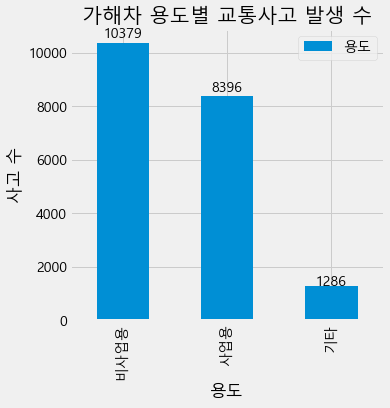

In [117]:
plt.figure(figsize=[5,5])
ax7=df['용도'].value_counts().plot(kind='bar')
plt.legend(loc='upper right',bbox_to_anchor=(1.0, 1))
for p in ax7.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax7.annotate("%.0f"%(height), (left+width/2, height*1.02), ha='center')
plt.title('가해차 용도별 교통사고 발생 수')
plt.xlabel('용도')
plt.ylabel('사고 수')

Text(0, 0.5, '사고 수')

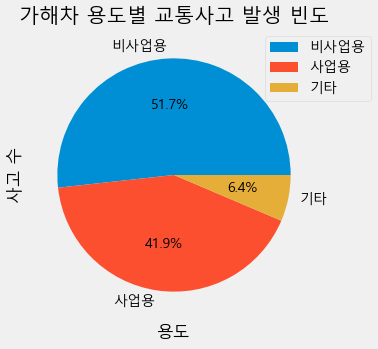

In [118]:
plt.figure(figsize=[5,5])
df['용도'].value_counts().sort_values(ascending=False).plot(kind='pie', autopct='%0.1f%%')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))
plt.title('가해차 용도별 교통사고 발생 빈도')
plt.xlabel('용도')
plt.ylabel('사고 수')

- 비사업용이 전체 사고의 51.7%, 사업용이 41.9% 차지함. 

Text(0, 0.5, '사고 수')

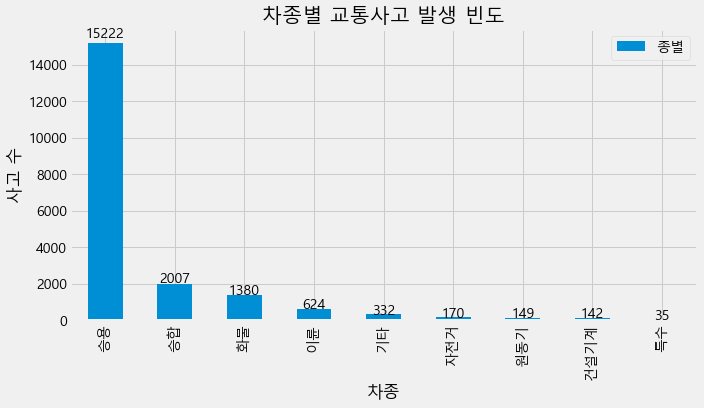

In [119]:
plt.figure(figsize=[10,5])
ax3=df['종별'].value_counts().plot(kind='bar')
plt.legend(loc='upper right',bbox_to_anchor=(1.0, 1))
for p in ax3.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax3.annotate("%.0f"%(height), (left+width/2, height*1.02), ha='center')
plt.title('차종별 교통사고 발생 빈도')
plt.xlabel('차종')
plt.ylabel('사고 수')

Text(0, 0.5, '사고 수')

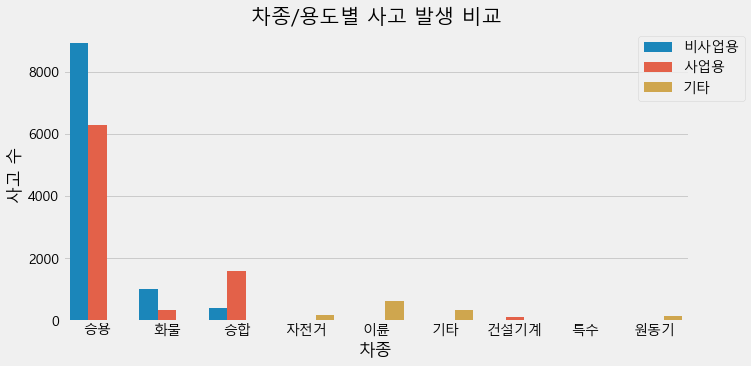

In [120]:
plt.figure(figsize=[10,5])
sns.countplot(data=df, x='종별', hue='용도')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.title('차종/용도별 사고 발생 비교')
plt.xlabel('차종')
plt.ylabel('사고 수')

- 승용차 > 승합차 > 화물차 순으로 사고 발생함.
- 승용차 교통사고가 많음.

In [121]:
df['종별'].value_counts().sort_values(ascending=False)

승용      15222
승합       2007
화물       1380
이륜        624
기타        332
자전거       170
원동기       149
건설기계      142
특수         35
Name: 종별, dtype: int64

----------------------------------------------

# 종로구

1. EDA  
 (1) 사고 발생 추세  
 (2) 인적특성  
 (3) 사고 다발 장소  
 (4) 사고 유형별  
 (5) 사고 등급별  
 (6) 법규위반  
 (7) 기상상태  
 (8) 차종/용도별  

In [122]:
df_jong=df[df['자치구']=='종로구']
df_jong

,년도,월,일,요일,시각,사고등급,사망자수,중상자수,경상자수,부상자수,...,사고유형2,법규위반,도로종류,지점명,위도,경도,자치구,Unnamed: 28,연령대,사고수
17481,2017,7,13,목요일,9,부상사고,0,0,0,1,...,측면직각충돌,안전거리미확보,특별광역시도,관철동14-1번지사거리,37.570176,126.983197,종로구,NaN,40대,1
17482,2017,9,1,금요일,3,중상사고,0,1,0,0,...,차대차-기타,안전운전불이행,특별광역시도,관철동14-1번지사거리,37.570176,126.983197,종로구,NaN,50대,1
17483,2017,11,24,금요일,1,경상사고,0,0,1,0,...,횡단중,신호위반,특별광역시도,관철동14-1번지사거리,37.570176,126.983197,종로구,NaN,50대,1
17484,2018,3,24,토요일,20,경상사고,0,0,1,1,...,차도통행중,안전운전불이행,특별광역시도,관철동14-1번지사거리,37.570176,126.983197,종로구,NaN,30대,1
17485,2018,7,28,토요일,18,경상사고,0,0,2,0,...,차대차-기타,안전거리미확보,특별광역시도,관철동14-1번지사거리,37.570176,126.983197,종로구,NaN,50대,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18319,2019,11,15,금요일,7,경상사고,0,0,1,0,...,차대차-기타,안전거리미확보,특별광역시도,혜화동로터리,37.585533,127.001217,종로구,NaN,50대,1
18320,2019,11,7,목요일,8,경상사고,0,0,2,0,...,측면직각충돌,안전운전불이행,특별광역시도,혜화동로터리,37.585533,127.001217,종로구,NaN,70대,1
18321,2019,11,15,금요일,8,경상사고,0,0,1,0,...,측면직각충돌,안전거리미확보,특별광역시도,혜화동로터리,37.585533,127.001217,종로구,NaN,60대,1
18322,2019,12,10,화요일,6,경상사고,0,0,1,0,...,측면직각충돌,신호위반,특별광역시도,혜화동로터리,37.585533,127.001217,종로구,NaN,50대,1


## 1. 종로구 3개년 사고발생 추세 

### 년도별

Text(0.5, 1.0, '년도별 사고 발생 건수')

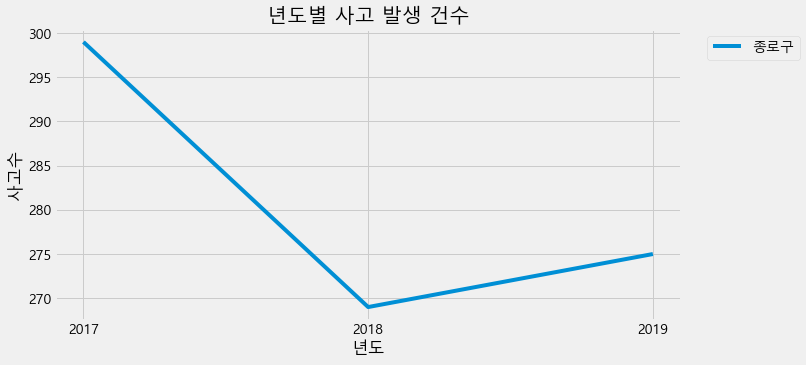

In [123]:
plt.figure(figsize=(10,5))
sns.lineplot(x="년도",y='사고수', hue='자치구', estimator=sum, data=df_jong)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.title('년도별 사고 발생 건수')

### 월별

Text(0, 0.5, '사고 수')

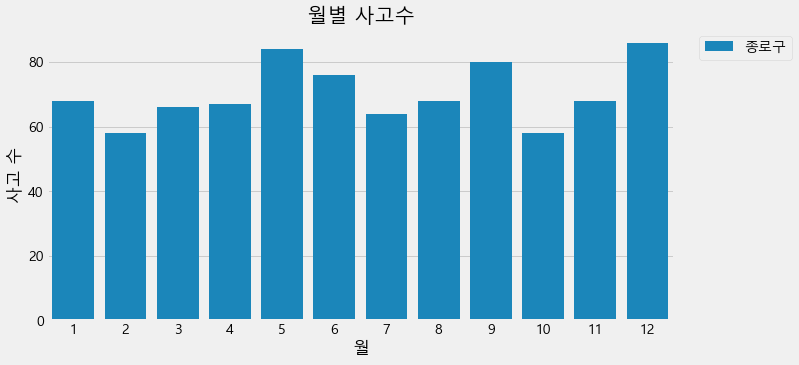

In [124]:
plt.figure(figsize=[10,5])
sns.countplot(data=df_jong, x='월', hue='자치구')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.title('월별 사고수')
plt.xlabel('월')
plt.ylabel('사고 수')

### 년도/월별

Text(0, 0.5, '사고 수')

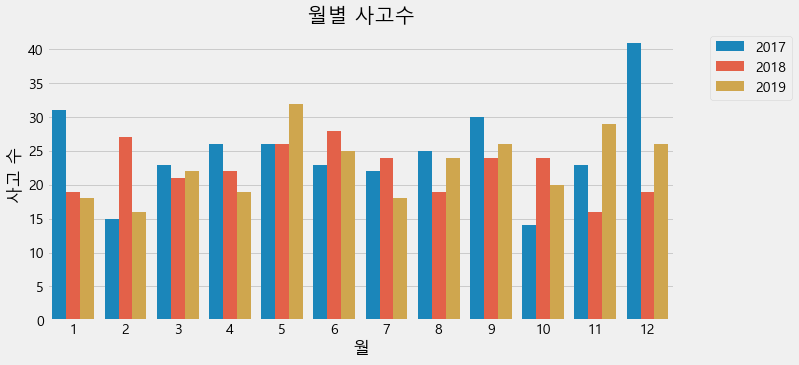

In [125]:
plt.figure(figsize=[10,5])
sns.countplot(data=df_jong, x='월', hue='년도')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.title('월별 사고수')
plt.xlabel('월')
plt.ylabel('사고 수')

### 요일별

Text(0, 0.5, '사고 수')

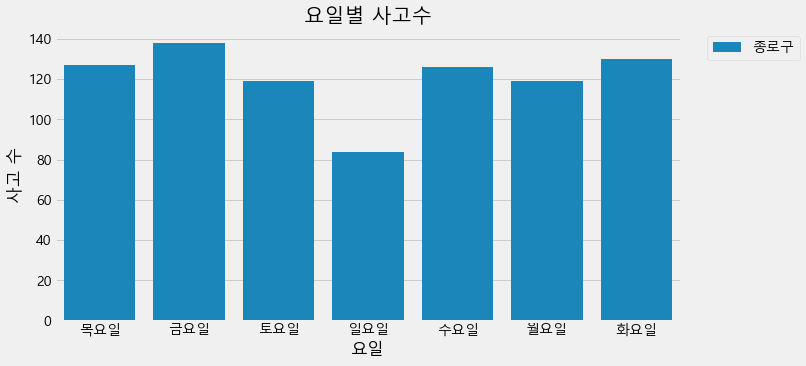

In [126]:
plt.figure(figsize=[10,5])
sns.countplot(data=df_jong, x='요일', hue='자치구')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.title('요일별 사고수')
plt.xlabel('요일')
plt.ylabel('사고 수')

### 년도/요일별

Text(0, 0.5, '사고 수')

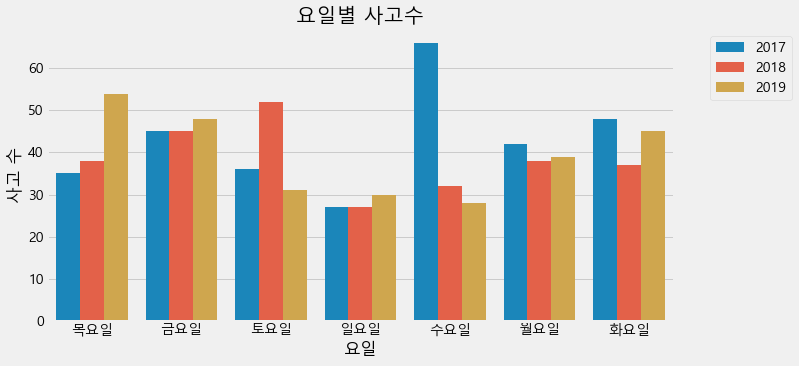

In [127]:
plt.figure(figsize=[10,5])
sns.countplot(data=df_jong, x='요일', hue='년도')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.title('요일별 사고수')
plt.xlabel('요일')
plt.ylabel('사고 수')

### 시간별

Text(0, 0.5, '사고 수')

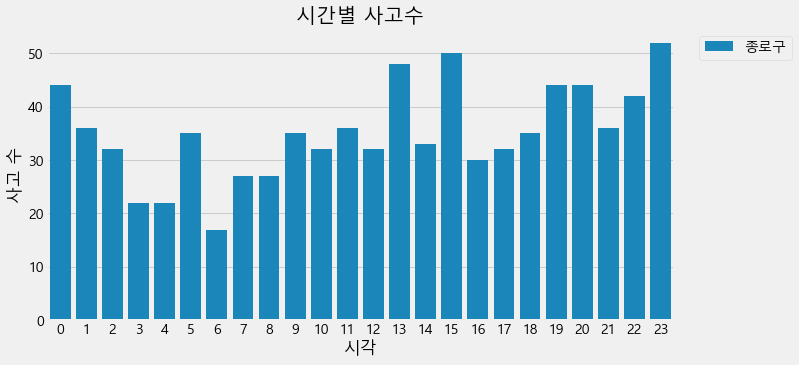

In [128]:
plt.figure(figsize=[10,5])
sns.countplot(data=df_jong, x='시각', hue='자치구')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.title('시간별 사고수')
plt.xlabel('시각')
plt.ylabel('사고 수')

### 년도/시간별

Text(0, 0.5, '사고 수')

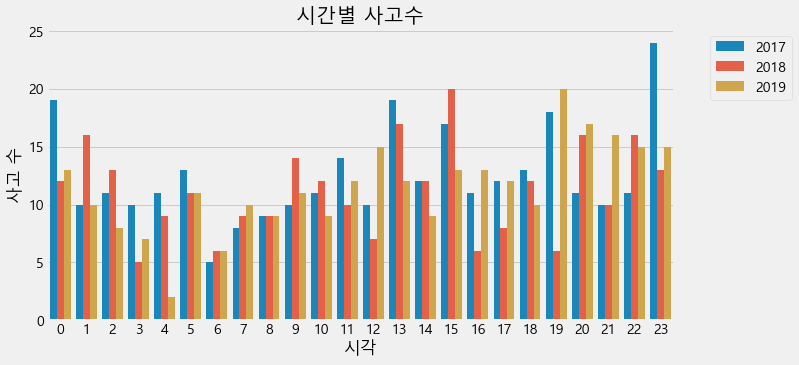

In [129]:
plt.figure(figsize=[10,5])
sns.countplot(data=df_jong, x='시각', hue='년도')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.title('시간별 사고수')
plt.xlabel('시각')
plt.ylabel('사고 수')

## 2. 종로구 교통사고 가해운전자 및 피해운전자 인적특성 

Text(0, 0.5, '사고 수')

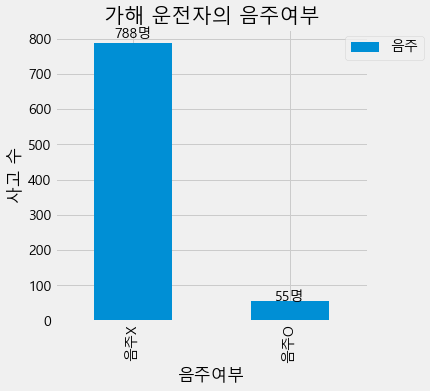

In [130]:
plt.figure(figsize=[5,5])
ax16=df_jong['음주'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))
for p in ax16.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax16.annotate("%.0f명"%(height), (left+width/2, height*1.02), ha='center')
    plt.title('가해 운전자의 음주여부')
plt.xlabel('음주여부')
plt.ylabel('사고 수')

Text(0.5, 0, '음주여부')

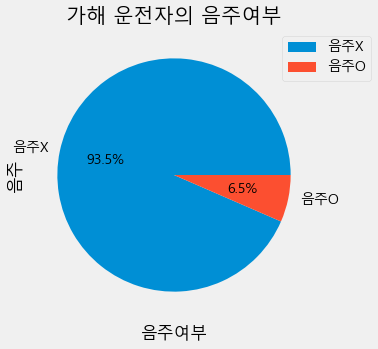

In [131]:
plt.figure(figsize=[5,5])
ax16=df_jong['음주'].value_counts().sort_values(ascending=False).plot(kind='pie', autopct='%0.1f%%')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))
plt.title('가해 운전자의 음주여부')
plt.xlabel('음주여부')

Text(0, 0.5, '사고 수')

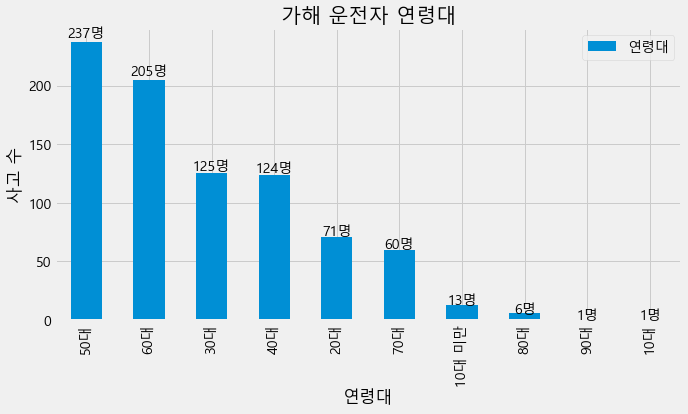

In [132]:
plt.figure(figsize=[10,5])
ax14=df_jong['연령대'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.legend(loc='upper right',bbox_to_anchor=(1.0, 1))
for p in ax14.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax14.annotate("%.0f명"%(height), (left+width/2, height*1.02), ha='center')
plt.title('가해 운전자 연령대')
plt.xlabel('연령대')
plt.ylabel('사고 수')


Text(0, 0.5, '사고 수')

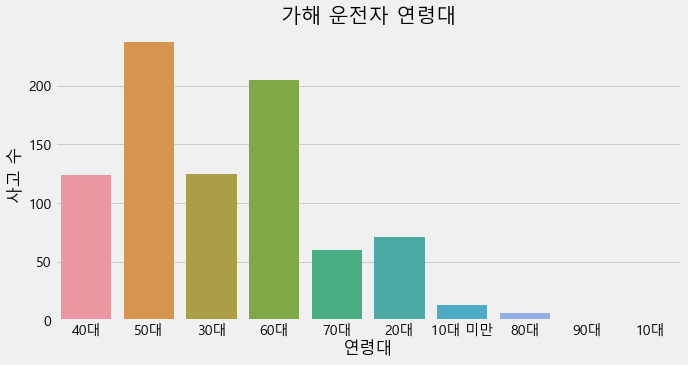

In [133]:
plt.figure(figsize=[10,5])
sns.countplot(data=df_jong, x='연령대')
plt.title('가해 운전자 연령대')
plt.xlabel('연령대')
plt.ylabel('사고 수')

Text(0, 0.5, '사고 수')

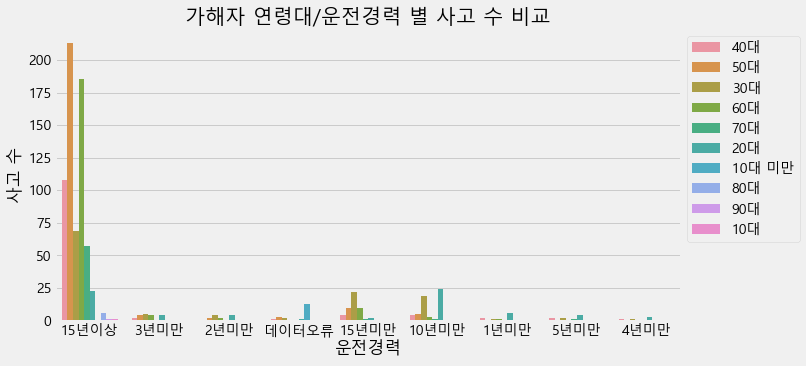

In [134]:
plt.figure(figsize=[10,5])
sns.countplot(data=df_jong, x='경력', hue='연령대')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('가해자 연령대/운전경력 별 사고 수 비교')
plt.xlabel('운전경력')
plt.ylabel('사고 수')

Text(0, 0.5, '사고 수')

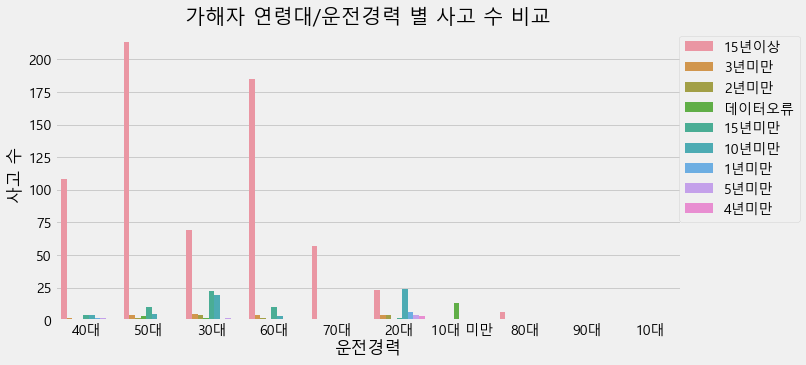

In [135]:
plt.figure(figsize=[10,5])
sns.countplot(data=df_jong, x='연령대', hue='경력')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('가해자 연령대/운전경력 별 사고 수 비교')
plt.xlabel('운전경력')
plt.ylabel('사고 수')

Text(0, 0.5, '사고 수')

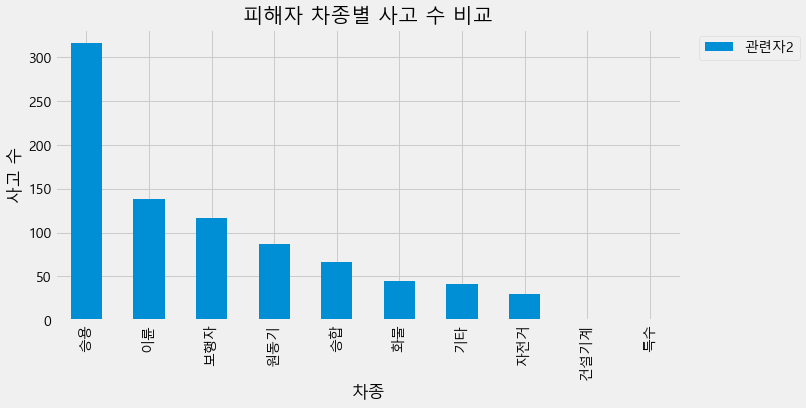

In [136]:
plt.figure(figsize=[10,5])
df_jong['관련자2'].value_counts().plot(kind='bar')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))
plt.title('피해자 차종별 사고 수 비교')
plt.xlabel('차종')
plt.ylabel('사고 수')

## 3. 종로구 교통사고 다발 장소

Text(0, 0.5, '발생 빈도')

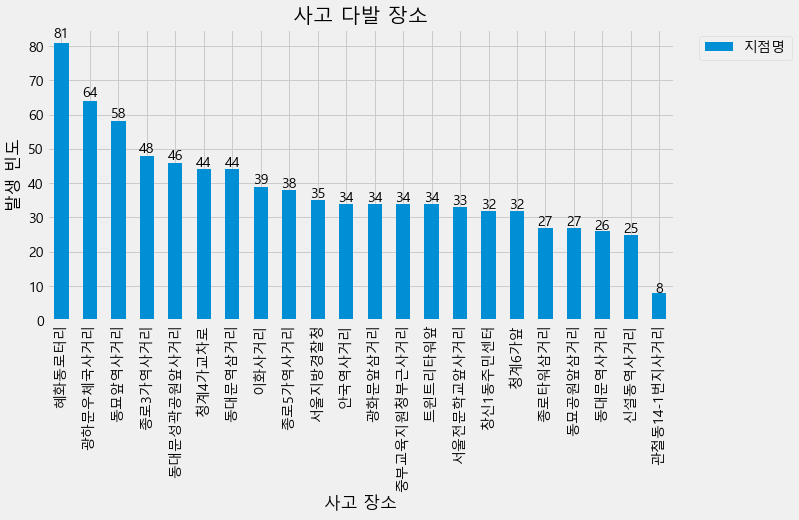

In [137]:
plt.figure(figsize=[10,5])
ax=df_jong['지점명'].value_counts().head(30).sort_values(ascending=False).plot(kind='bar', title='사고 다발 장소')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f"%(height), (left+width/2, height*1.02), ha='center')
plt.xlabel('사고 장소')
plt.ylabel('발생 빈도')

In [138]:
df_jong['지점명'].value_counts().sort_values(ascending=False)

혜화동로터리          81
광하문우체국사거리       64
동묘앞역사거리         58
종로3가역사거리        48
동대문성곽공원앞사거리     46
청계4가교차로         44
동대문역삼거리         44
이화사거리           39
종로5가역사거리        38
서울지방경찰청         35
안국역사거리          34
광화문앞삼거리         34
중부교육지원청부근사거리    34
트윈트리타워앞         34
서울전문학교앞사거리      33
창신1동주민센터        32
청계6가앞           32
종로타워삼거리         27
동묘공원앞삼거리        27
동대문역사거리         26
신설동역사거리         25
관철동14-1번지사거리     8
Name: 지점명, dtype: int64

## 4. 종로구 교통사고 유형별 세부유형 

### 사고유형별

Text(0, 0.5, '빈도')

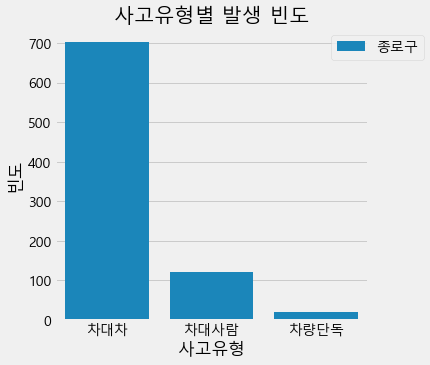

In [139]:
plt.figure(figsize=[5,5])
sns.countplot(data=df_jong, x='사고유형1',hue='자치구')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('사고유형별 발생 빈도')
plt.xlabel('사고유형')
plt.ylabel('빈도')

### 세부유형

Text(0.5, 0, '사고유형')

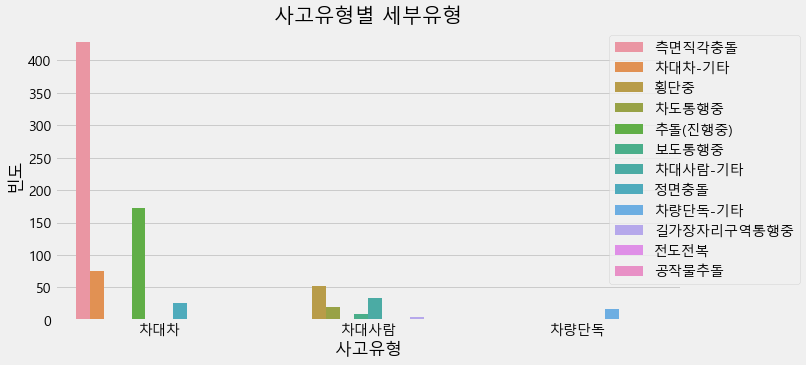

In [140]:
plt.figure(figsize=(10,5))
sns.countplot(x="사고유형1", hue="사고유형2", data=df_jong)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('사고유형별 세부유형')
plt.ylabel('빈도')
plt.xlabel('사고유형')

Text(0, 0.5, '빈도')

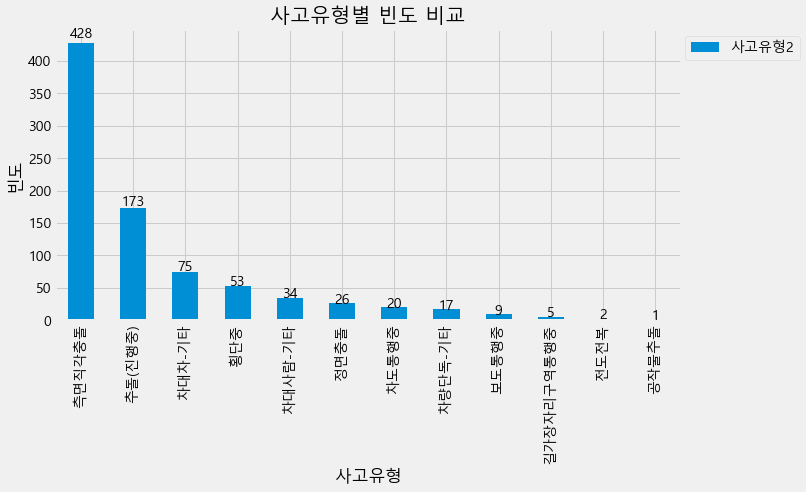

In [141]:
plt.figure(figsize=[10,5])
ax15=df_jong['사고유형2'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))
for p in ax15.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax15.annotate("%.0f"%(height), (left+width/2, height*1.02), ha='center')
plt.title('사고유형별 빈도 비교')
plt.xlabel('사고유형')
plt.ylabel('빈도')

## 5. 종로구 교통사고 등급별 

Text(0.5, 1.0, '사고등급별 발생건수 비교')

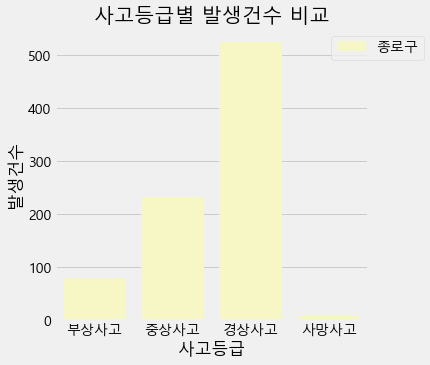

In [142]:
plt.figure(figsize=(5,5))
sns.countplot(x="사고등급",hue='자치구',data=df_jong, palette='Spectral').set_ylabel("발생건수")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('사고등급별 발생건수 비교')

Text(0, 0.5, '사고 발생 건수')

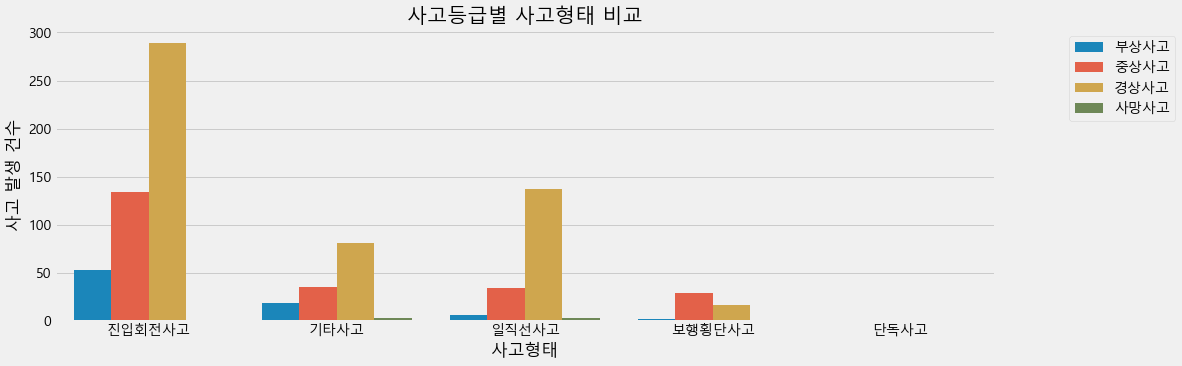

In [143]:
plt.figure(figsize=[15,5])
sns.countplot(data=df_jong, x='사고형태', hue='사고등급')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('사고등급별 사고형태 비교')
plt.xlabel('사고형태')
plt.ylabel('사고 발생 건수')

## 6. 종로구 교통사고 법규위반 종류

Text(0, 0.5, '빈도')

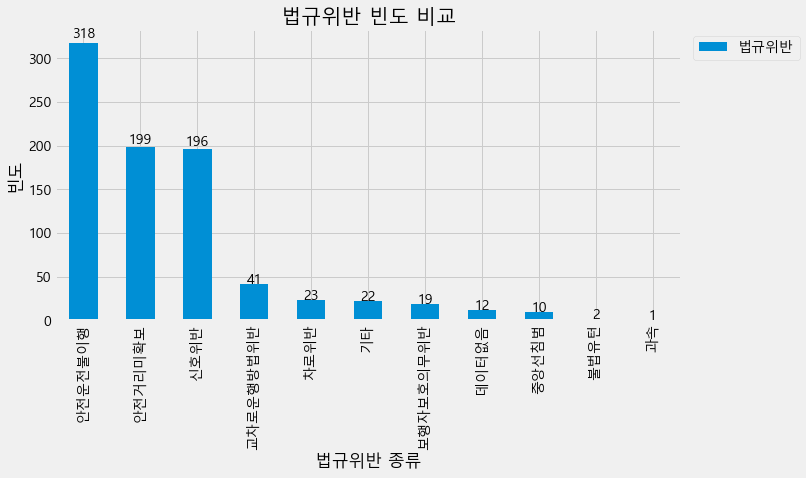

In [144]:
plt.figure(figsize=[10,5])
ax2=df_jong['법규위반'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))
for p in ax2.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax2.annotate("%.0f"%(height), (left+width/2, height*1.02), ha='center')
plt.title('법규위반 빈도 비교')
plt.xlabel('법규위반 종류')
plt.ylabel('빈도')

Text(0, 0.5, ' ')

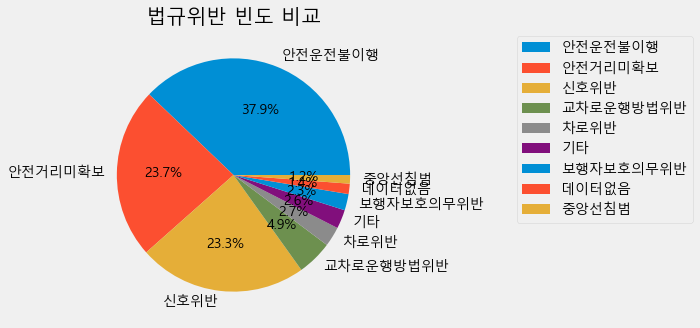

In [145]:
plt.figure(figsize=[5,5])
df_jong['법규위반'].value_counts().head(9).sort_values(ascending=False).plot(kind='pie', autopct='%0.1f%%')
plt.legend(loc='upper right',bbox_to_anchor=(2.1, 1))
plt.title('법규위반 빈도 비교')
plt.ylabel(' ')

## 7. 종로구 교통사고 발생 시 기상상태

Text(0, 0.5, '빈도')

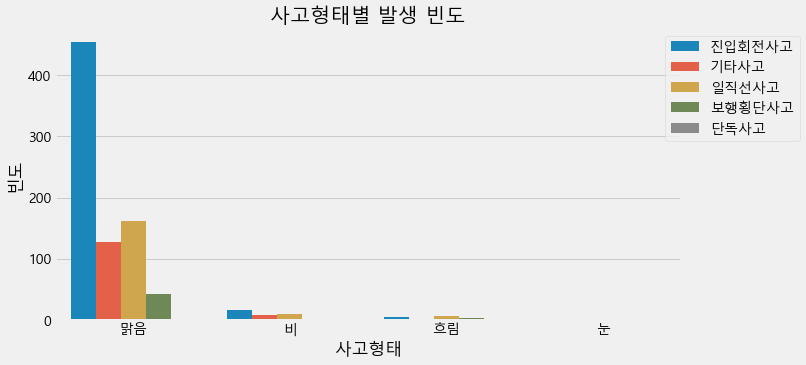

In [146]:
plt.figure(figsize=[10,5])
sns.countplot(data=df_jong, x='기상상태', hue='사고형태')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('사고형태별 발생 빈도')
plt.xlabel('사고형태')
plt.ylabel('빈도')

## 8. 종로구 교통사고 차종/용도별 

### 용도별

Text(0, 0.5, '사고 수')

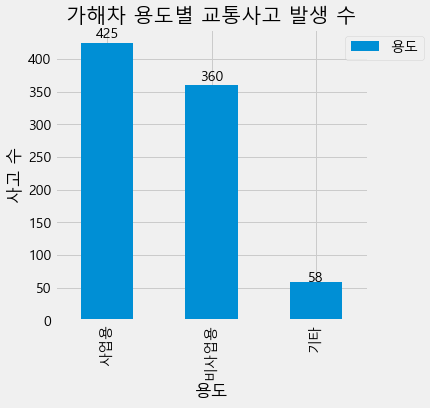

In [147]:
plt.figure(figsize=[5,5])
ax7=df_jong['용도'].value_counts().plot(kind='bar')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))
for p in ax7.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax7.annotate("%.0f"%(height), (left+width/2, height*1.02), ha='center')
plt.title('가해차 용도별 교통사고 발생 수')
plt.xlabel('용도')
plt.ylabel('사고 수')

Text(0, 0.5, '사고 수')

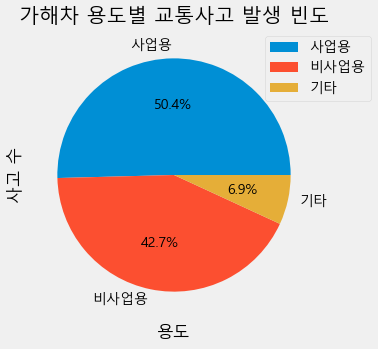

In [148]:
plt.figure(figsize=[5,5])
df_jong['용도'].value_counts().sort_values(ascending=False).plot(kind='pie', autopct='%0.1f%%')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))
plt.title('가해차 용도별 교통사고 발생 빈도')
plt.xlabel('용도')
plt.ylabel('사고 수')

### 차종별

Text(0, 0.5, '사고 수')

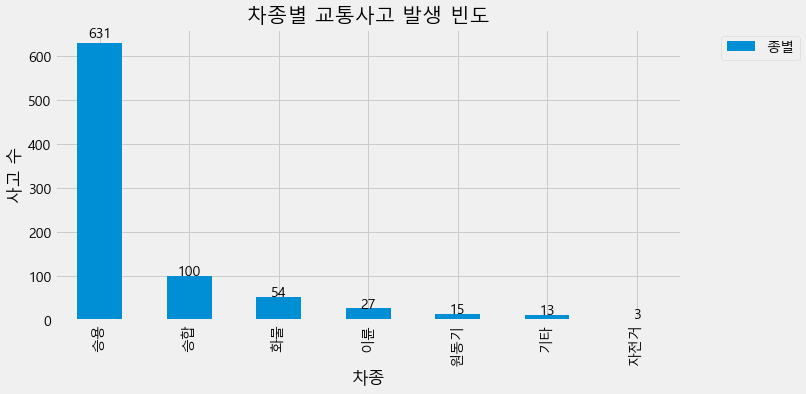

In [149]:
plt.figure(figsize=[10,5])
ax3=df_jong['종별'].value_counts().plot(kind='bar')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))
for p in ax3.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax3.annotate("%.0f"%(height), (left+width/2, height*1.02), ha='center')
plt.title('차종별 교통사고 발생 빈도')
plt.xlabel('차종')
plt.ylabel('사고 수')

### 차종/용도별

Text(0, 0.5, '사고 수')

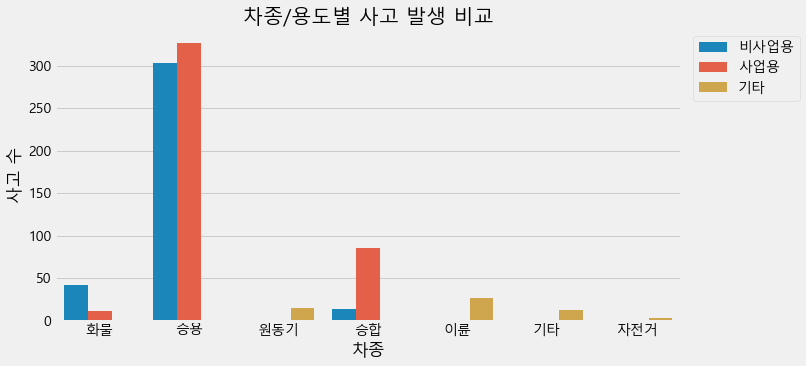

In [150]:
plt.figure(figsize=[10,5])
sns.countplot(data=df_jong, x='종별', hue='용도')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('차종/용도별 사고 발생 비교')
plt.xlabel('차종')
plt.ylabel('사고 수')

## 2. 기계 학습

In [151]:
df

,년도,월,일,요일,시각,사고등급,사망자수,중상자수,경상자수,부상자수,...,사고유형2,법규위반,도로종류,지점명,위도,경도,자치구,Unnamed: 28,연령대,사고수
0,2017,3,2,목요일,11,경상사고,0,0,1,0,...,정면충돌,신호위반,특별광역시도,구역삼세무서,37.498266,127.030105,강남구,NaN,20대,1
1,2017,3,5,일요일,12,경상사고,0,0,2,0,...,측면직각충돌,안전거리미확보,특별광역시도,구역삼세무서,37.498266,127.030105,강남구,NaN,60대,1
2,2017,3,27,월요일,23,경상사고,0,0,1,0,...,정면충돌,안전운전불이행,특별광역시도,구역삼세무서,37.498266,127.030105,강남구,NaN,40대,1
3,2017,4,21,금요일,1,중상사고,0,2,0,0,...,정면충돌,신호위반,특별광역시도,구역삼세무서,37.498266,127.030105,강남구,NaN,30대,1
4,2017,4,30,일요일,8,경상사고,0,0,1,0,...,정면충돌,안전운전불이행,특별광역시도,구역삼세무서,37.498266,127.030105,강남구,NaN,30대,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20056,2019,4,4,목요일,14,경상사고,0,0,1,0,...,측면직각충돌,직진우회전진행방해,특별광역시도,중화중삼거리,37.586616,127.094805,중랑구,NaN,30대,1
20057,2019,7,9,화요일,15,경상사고,0,0,1,0,...,추돌(진행중),안전거리미확보,특별광역시도,중화중삼거리,37.586616,127.094805,중랑구,NaN,50대,1
20058,2019,9,16,월요일,8,중상사고,0,1,0,0,...,측면직각충돌,신호위반,특별광역시도,중화중삼거리,37.586616,127.094805,중랑구,NaN,70대,1
20059,2019,10,2,수요일,9,경상사고,0,0,3,0,...,추돌(진행중),안전거리미확보,특별광역시도,중화중삼거리,37.586616,127.094805,중랑구,NaN,40대,1


### 변수 정보

|**변수명**|**값 설명**|
|:-----|:-----|
|**년도**|2017, 2018, 2019|
|**월**|1-12월|
|**일**|1-31일|
|**요일**|월요일-일요일|
|**시각**|0~23시|
|**사고등급**|경상사고, 부상사고, 사망사고, 중상사고|
|**사망자수**|0~2|
|**중상자수**|0~14|
|**경상자수**|0~41|
|**부상자수**|0~10|
|**연령**|0~98|
|**성별**|남, 여|
|**경력**|1년미만, 2년미만, 3년미만, 4년미만, 5년미만, 10년미만, 15년미만, 15년이상|
|**음주**|O, X|
|**종별**|건설기계, 승용, 승합, 원동기, 이륜, 자전거, 특수, 화물, 기타|
|**용도**|사업용, 비사업용, 기타|
|**관련자2**|건설기계, 보행자, 승용, 승합, 원동기, 이륜, 자전거, 특수, 화물, 기타|
|**사고형태**|기타사고, 단독사고, 보행횡단사고, 일직선사고, 주정차사고, 진입회전사고|
|**기상상태**|눈, 맑음, 비, 안개, 흐림, 기타|
|**일광상태**|새벽, 주간, 출퇴근, 심야|
|**사고유형1**|차대사람, 차대차, 차량단독|
|**사고유형2**|공작물추돌, 길가장자리구역통행중, 도로외이탈(기타), 도로외이탈(추락). 보도통행중, 전도전복, 정면충돌, 차대사람-기타, 차대차-기타, 차도통행중, 차량단독-기타, 추돌(주정차중), 추돌(진행중), 측면직각충돌, 횡단중|
|**법규위반**|불법유턴, 차로위반, 보행자보호의무위반, 신호위반, 직진우회전진행방해, 안전운전불이행, 안전거리미확보, 중앙선침범, 교차로운행방법위반, 과속, 기타|
|**도로종류**|고속국도, 특별광역시도, 기타|
|**지점명**|사고 장소명|
|**위도**|지구상의 위치를 표시하는 좌표|
|**경도**|지구상의 위치를 표시하는 좌표|
|**자치구**|강남구, 강동구, 강북구, 강서구, 관악구, 광진구, 구로구, 금천구, 노원구, 도봉구, 동대문구, 동작구, 마포구, 서대문구, 서초구, 성동구, 성북구, 송파구, 양천구, 영등포구, 용산구, 은평구, 종로구, 중구, 중랑구|